# Teste datasets IHDP e Twins

## Introdução em Inferência Causal

Nos últimos anos, temos visto uma crescente relevância da literatura em inferência causal para a indústria e para o meio acadêmico. Com o turing award em 2011 para Judea Pearl e o Nobel em 2021 para Angrist e Imbems, autores referência na área.

Normalmente em problemas de predição e regressão, gostaríamos que nossos modelos estimassem de forma precisa a distribuição de probabilidade condicional $P[Y |\, X]$, i.e., a distribuição do target condicionada nas covariáveis ou na matriz de features $X$. No entanto, em inferência causal gostaríamos de saber $P[Y |\, \text{do}(t) , X]$ que pode ser visto como a distribuição do target $Y$ dada as features $X$ e aplicando o tratamento ou intervenção $t$, sendo $\text{do}(t)$ o do-operator descrito em [4].

Vamos detalhar um pouco mais conceitos, aplicações e metodologias baseados no Potential Outcomes Framework, também chamado de Neyman-Rubin Potential Outcome. Este framework se baseia em efeitos causais estarem amarrados aos tratamentos aplicados às unidades. 


### Conceitos de Inferência Causal

Apenas para simplificar a demonstração dos conceitos, vamos considerar um tratamento binário $t_i \in [0, 1]$ aplicado à uma unidade $i$. No entanto, todos os conceitos e premissas abaixo são generalizáveis para os casos de múltiplos tratamentos e para tratamentos contínuos. 
* O efeito observado é definido por $Y_i$ para unidade $i$
* O efeito potencial é definido por $Y(t_i)$, sendo $t_i$ o tratamento aplicado à unidade $i$. Se $t_i = 0$, então $Y(0)$ ou $Y^{\text{f}}$ é o efeito factual e $Y(1)$ ou $Y^{\text{cf}}$ é o efeito contrafactual
* O efeito causal em nível de indívidual, também chamado como Individual Treatment Effect (ITE), pode ser definido como $Y_i(1) - Y(0)_i$ que pode ser apenas estimado, uma vez que o resultado contrafactual não é observado. 
* Podemos também definir o efeito causal a nível de população ou Average Treatment Effect (ATE) como $\text{ATE} = \mathbb{E}[Y(1)]-\mathbb{E}[Y(0)]$ ou em nível de subgrupos ou Conditional Average Treatment Effect (CATE) sendo $\text{CATE} = \mathbb{E}[Y(1) |\, X = x]-\mathbb{E}[Y(0) |\, X = x]$
* O padrão ouro para mapear efeitos causais é efetuar um Teste Controlado Randomizado ou Randomized Controlled Tests (RCTs), uma vez que resultados são independentes de tratamentos, então medir efeito causal é simplesmente $\text{ATE} = \mathbb{E}[Y(1)]-\mathbb{E}[Y(0)] = \mathbb{E}[Y(1)|\,T = 1]-\mathbb{E}[Y(0) |\,T = 0]$.

Quando tratamento não é randomizado (geralmente em dados observacionais, ao contrário de dados de RCTs), é necessário condicionar em todas as variáveis de confusão (ou confounders) para se atingir a independência condicional ou $$\{Y(1), Y(0)\} \perp T \mid X, \quad 0 < p(X) < 1, \quad X(1)=X(0)=X,$$ onde $p(X) = Pr(T = 1 |\, X)$ é o propensity score, i.e, probabilidade de se designar um tratamento para a unidade.


Dessa forma, vamos especificar algumas premissas que devem ser assumidas para se calcular efeitos causais em dados observacionais.

#### Stable Unit Treatment Variance Assumption (SUTVA)
O efeito causal dado um tratamento para uma unidade não é afetado pelos tratamentos de outras unidades:
\begin{equation}
	Y_{i}\left(t_{i}, \mathbf{t}_{-i}\right)=Y_{i}\left(t_{i}\right) \text { for } t_{i} \in\{0,1\} \text { and any assignment } \mathbf{d}_{-i}.
\end{equation}


#### No Unmeasured Confounders (NUC) or Ignorability

Seja $Y$ o resultado observado, $t \in [0,1]$ o tratamento aplicado, $X$ a matriz de covariáveis ou features contendo todos os potenciais confounders, e $Y [t]$ é o resultado/efeito potencial dado o tratamento $t$, então: $\big(Y(1), Y(0)\big) \perp T | \, X$.


#### Positivity
Para cada valor possível da matriz de covariáveis $X$, a chance de aplicar um tratamento não é determinística, i.e., $0 < P(T | X = x) < 1$.

As premissas de Ignorability e Positivity juntas formam o que é conhecido na literatura como Strong Ignorability ou $P(Y | D, X) = P(Y [D] | X)$. Se esssas premissas não forem observadas ao se analisar efeitos causais, os resultados podem ser afetados por viéses de seleção e correlações espúrias

#### Unobserved Confounders

As premissas acima nem sempre são testáveis e portanto podem não ser respeitadas na prática. Geralmente, se demanda conhecimento profundo do domínio do problema. Portanto, é comum que existam unobsorved confounders.

Existem três principais abordagens para lidar com unobserved confounders. A primeira se trata de utilizar as chamadas instrumental variables [6], mas demanda conhecimento profundo do problema e, também, pode ser não testável na prática.

Outra abordagem seria utilizar dados observacionais e intervencionais juntos, como mencionado, RCTs são o padrão ouro para mapear efeitos causais, porém, podem sofrer alguns problemas de design como generalização ou transportabilidade dos efeitos mapeados no grupo para a população em geral. Já dados observacionais são, geralmente, mais representativos da população geral, porém sofrem com unobsorved confounders como citado. Alguns autores alanvancam as vantagens de ambos tipos de dados para resolver seus respectivos problemas como em [7].

Já como em alguns casos RCTs são inviáveis de serem feitos, alguns autores, como [1] ou [8], aproveitam de proxies, variáveis com mensuram efeitos dos confounders e/ou da relação entre aplicação de diversos tratamentos para uma mesma unidade para aprender variáveis latentes que tem o efeito de deconfounder. 

### Objetivos: 

* Reforçar conceitos de inferência causal
* Desenvolver modelagem moderna para identificação de efeitos causais
* Estudar datasets populares para benchmarking de efeitos causais
* Analisar o efeito de unobsorved confounders na performance dos modelos


### Instalando / Importando Bibliotecas Necessárias

In [2]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 6.9 MB/s 
     |████████████████████████████████| 81 kB 11.5 MB/s 
     |████████████████████████████████| 209 kB 67.0 MB/s 
     |████████████████████████████████| 78 kB 9.0 MB/s 
     |████████████████████████████████| 112 kB 61.1 MB/s 
     |████████████████████████████████| 147 kB 62.1 MB/s 
     |████████████████████████████████| 49 kB 7.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=462006b6efb53e5d6533c8ac30020d9762ef8875c973f3e3b769e821d2126099
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [3]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!git clone https://github.com/uber/causalml.git
!pip install -r causalml/requirements-tf.txt
!pip install causalml[tf]
!pip install -U numpy	

Cloning into 'causalml'...
remote: Enumerating objects: 3205, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 3205 (delta 40), reused 32 (delta 15), pack-reused 3128
Receiving objects: 100% (3205/3205), 35.79 MiB | 27.85 MiB/s, done.
Resolving deltas: 100% (1983/1983), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.1 MB 1.9 MB/s 
     |████████████████████████████████| 569 kB 53.2 MB/s 
     |████████████████████████████████| 1.8 MB 44.1 MB/s 
     |████████████████████████████████| 718 kB 58.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pym

In [5]:
import pandas as pd 
import numpy as np 
from pathlib import Path
from typing import Any, Tuple
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set(style='ticks', palette='Set2')
sns.set_context("talk", font_scale=1.2)
import optuna
from optuna.visualization import plot_optimization_history, plot_intermediate_values, plot_parallel_coordinate, plot_contour, plot_slice, plot_param_importances
import joblib

In [6]:
from causalml.inference.meta import BaseXClassifier, BaseSClassifier, BaseRClassifier, BaseTClassifier
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from lightgbm import LGBMRegressor, LGBMClassifier

from causalml.inference.nn import CEVAE
from causalml.propensity import GradientBoostedPropensityModel
from causalml.metrics import *
from causalml.dataset import simulate_hidden_confounder

import torch

## Datasets

Vamos estudar dois datasets famosos para benchmarking de modelos causais. 

### Infant Health and Development Program (IHDP)

Contempla diversas variáveis, ou confounders, mensurados de criaças e suas mães em um estudo para entender o efeito de cuidado de qualidade de crianças com visitas de especialistas em futuros testes cognitivos. O teste randomizado contempla 747 crianças (139 com tratamento e 608 sem). Os dados usados como benchmarking são simulações baseadas nos dados reais do experimento IHDP. Assim, como em [1], vamos utilizar dataset com 100 repetições dessas simulações. 

O dataset compreende:
* $X$: 25 covariáveis entre variáveis binárias e reais 
* $t$: tratamento (binário)
* $y$: resposta observada (possuem ruídos)
* $y^{\mathrm{cf}}$: resposta contrafactual. Resultado de simulação (possuem ruídos)
* $\mu_0$ e $\mu_1$: respostas potenciais ao tratamento sem ruído, ou seja, a resposta real que a unidade daria sem e com tratamento, respectivamente

In [7]:
class IHDP(object):
  def __init__(self):
    dfs = []
    for i in range(1, 10):
        dfs.append(pd.read_csv(Path('./IHDP/ihdp_npci_' + str(i) + '.csv'), header=None))

    self.df = pd.concat(dfs, ignore_index = True)
    cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + [i for i in range(25)]
    self.df.columns = cols
    # Replicar os dados 100 vezes como feito em [1]
    replications = 100
    self.df = pd.concat([self.df]*replications, ignore_index=True)

    self.binary_features = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
    self.continuos_features = [i for i in range(25) if i not in self.binary_features]
    self.features = self.binary_features + self.continuos_features

    self.df['y0'] = np.where(self.df['treatment'] == 0, self.df['y_factual'], self.df['y_cfactual'])
    self.df['y1'] = np.where(self.df['treatment'] == 1, self.df['y_factual'], self.df['y_cfactual'])
    self.df['tau'] = self.df['y1'] - self.df['y0']

  def split_train_test(self, seed = 42):
    X_train_full, X_test_full = train_test_split(self.df, test_size = 0.2, random_state = seed)

    X_train, t_train, y_train, tau_train, y_potential_train = X_train_full[self.features], X_train_full['treatment'], X_train_full['y_factual'], X_train_full['tau'],  np.vstack((X_train_full['mu0'].values, X_train_full['mu1'])).T
    X_test, t_test, y_test, tau_test, y_potential_test = X_test_full[self.features], X_test_full['treatment'], X_test_full['y_factual'], X_test_full['tau'],  np.vstack((X_test_full['mu0'].values, X_test_full['mu1'])).T

    return X_train, t_train, y_train, tau_train, y_potential_train, X_test, t_test, y_test, tau_test, y_potential_test

  def kfold(self, num_fold = 4, seed = 42 ):
    kf = KFold(n_splits=num_fold, shuffle = True, random_state = seed)
    for id_train, id_test in kf.split(self.df):
      X_train_full = self.df.iloc[id_train, :]
      X_test_full = self.df.iloc[id_test, :]
      X_train, t_train, y_train, tau_train, y_potential_train = X_train_full[self.features], X_train_full['treatment'], X_train_full['y_factual'], X_train_full['tau'],  np.vstack((X_train_full['mu0'].values, X_train_full['mu1'])).T
      X_test, t_test, y_test, tau_test, y_potential_test = X_test_full[self.features], X_test_full['treatment'], X_test_full['y_factual'], X_test_full['tau'],  np.vstack((X_test_full['mu0'].values, X_test_full['mu1'])).T
      yield X_train, t_train, y_train, tau_train, y_potential_train, X_test, t_test, y_test, tau_test, y_potential_test

In [76]:
ihdp = IHDP()
ihdp.df.head()

,treatment,y_factual,y_cfactual,mu0,mu1,0,1,2,3,4,...,18,19,20,21,22,23,24,y0,y1,tau
0,1,5.599916,4.318780,3.268256,6.854457,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,0,0,0,0,0,0,4.318780,5.599916,1.281137
1,0,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,0,0,0,0,0,0,6.875856,7.856495,0.980638
2,0,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,0,0,0,0,0,2.996273,6.633952,3.637680
3,0,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,0,0,0,0,0,1.366206,5.697239,4.331034
4,0,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,0,0,0,0,0,0,1.963538,6.202582,4.239043


### Twins

Este dataset contem dados de gêmeos introduzido em [1] e também é um dataset amplamente estudado na literatura de Causal Inference. Neste dataset, o autor coleta covariáveis sobre os pais (e.g. estado civil, nível de educação, raça e local de residência), sobre a gravidez (e.g. quantidade de gravidezes anteriores, fatores de risco como diabetes uso de alcool) e sobre o nascimento (e.g. local, semanas de gestão). Os autores consideram o tratamento $t$ binário como o gêmeo com maior peso e, portanto, o outro gêmeo poderia ser visto como contrafactual. O resultado a ser medido é a mortalidade.

Para simular um estudo observacional, vamos aleatorizar o tratamento condicionado a confounders na matriz de features de acordo com a seguinte distribuição $\mathbf{t}_{i} \mid \mathbf{x}_{i}, \mathbf{z}_{i} \sim \operatorname{Bern}\left(\sigma\left(w_{o}^{\top} \mathbf{x}+w_{h}(\mathbf{z}/5 - 0.1)\right)\right)$, sendo $w_{o} \sim \mathcal{N}(0,0.1 \cdot I), w_{h} \sim \mathcal{N}(5,0.1)$, $x$ é matriz e covariáveis e $z$ é a variável gestat5 que representa buckets de semanas de gestação, sendo que o nível 0 representa menos que 20 semanas, 1 entre 20 e 27 e assim por diante. Sabe-se que é uma variável bem correlacionada com a mortalidade.

Vamos replicar a metodologia em [1] para gerar unobserved confounders com proxies. Vamos aplicar one-hot-encoding 3 vezes, ou seja, gerando 15 novas variáveis que vamos chamar de proxies. A partir de então, vamos fazer um flip dos bits com certa probabilidade $p^{\mathrm{flip}}$ de cada um dos proxies para trazer ruído entre os proxies e o unobserved confounder. Para altas probabilidades, por exemplo, há correlação baixa entre proxies e o unobserved confounder.

In [8]:
class TWINS(object):
  def __init__(self):
    df = pd.read_csv('Twin_Data.csv')
    df.columns = [x.replace("'", "").replace("’", "") for x in df.columns]

    # Values to Treat => 8: factor not on certificate, 9: factor not classifiable --> np.nan --> mode imputation
    medrisk_list = ["anemia","cardiac","lung","diabetes","herpes","hydra","hemo","chyper","phyper","eclamp","incervix","pre4000","dtotord","preterm","renal","rh","uterine","othermr",]
    # Values to Treat => 99: missing
    other_list = ["cigar", "drink", "wtgain", "gestat", "dmeduc", "nprevist"]

    other_list2 = ["pldel", "resstatb"]  # but no samples are missing..

    self.binary_features = ["dmar", "anemia", "cardiac", "lung", "diabetes", "herpes", "hydra", "hemo", "chyper", "phyper", "eclamp", "incervix", "pre4000", "preterm", "renal", "rh", "uterine", "othermr"] 
    self.continuos_features = ["dmage", "mpcb", "dtotord"] + other_list
    self.categorical_features = ["adequacy"] + other_list2

    for feat in medrisk_list:
        df[feat] = df[feat].apply(lambda x: df[feat].mode()[0] if x in [8, 9] else x)

    for feat in other_list:
        df.loc[df[feat] == 99, feat] = df.loc[df[feat] != 99, feat].mean()

    for feat in self.binary_features:
        df[feat] = np.where(~df[feat].isna(), df[feat] - 1, df[feat])

    df_features = df[self.continuos_features + self.binary_features]

    for feat in self.categorical_features:
        df_features = pd.concat(
            [df_features, pd.get_dummies(df[feat], prefix=feat)], axis=1
        )

    # Preparando gestat com 5 buckets
    df_features['gestat5'] = pd.cut(df_features['gestat'], bins = [0, 20, 27, 34, 41, 48], labels = range(5)).astype(int)
    self.backup_gestat = df_features.pop('gestat')

    self.continuos_features.remove('gestat')
    self.features = np.array(df_features.columns)
    self.features = np.array(list(reversed(self.features)))
    self.binary_features = list(set(self.features) - set(self.continuos_features))
    self.outcome_features = ['y0', 'y1', 'y', 't']

    # Normalizando variáveis contínuas
    enc = MinMaxScaler()
    df_features[self.continuos_features] = enc.fit_transform(df_features[self.continuos_features])

    df_features['y0'] = (df[["outcome(t=0)"]] < 9999).astype(int)
    df_features['y1'] = (df[["outcome(t=1)"]] < 9999).astype(int)

    t = self.get_treatment(df_features) 
    df_features['t'] = t
    df_features['y'] = df_features['y1'] * t + df_features['y0'] * (1 - t)
    self.df = df_features

  def split_train_test(self, proxy_prob = 0.1, seed = 42):
    df_features = self.create_proxies(prob = proxy_prob)
    if proxy_prob <= 0:
      df_features['gestat'] = (self.backup_gestat - self.backup_gestat.min()) / (self.backup_gestat.max() - self.backup_gestat.min())
      df_features.pop('gestat5')

    features = np.array([x for x in df_features.columns if x not in self.outcome_features])
    features = np.array(list(reversed(features)))
    binary_features = list(set(features) - set(self.continuos_features))

    X_train_full, X_test_full = train_test_split(df_features, test_size = 0.2, random_state = seed)

    # X_train, t_train, y_train, y_potential_train = X_train_full[features].values, X_train_full['t'].values, X_train_full['y'].values,  np.vstack((X_train_full['y0'].values, X_train_full['y1'])).T
    # X_test, t_test, y_test, y_potential_test = X_test_full[features].values, X_test_full['t'].values, X_test_full['y'].values,  np.vstack((X_test_full['y0'].values, X_test_full['y1'])).T
    X_train, t_train, y_train, y_potential_train = X_train_full[features], X_train_full['t'], X_train_full['y'],  np.vstack((X_train_full['y0'].values, X_train_full['y1'])).T
    X_test, t_test, y_test, y_potential_test = X_test_full[features], X_test_full['t'], X_test_full['y'],  np.vstack((X_test_full['y0'].values, X_test_full['y1'])).T

    return X_train, t_train, y_train, y_potential_train, X_test, t_test, y_test, y_potential_test

  def create_proxies(self, prob = 0.05):
    df_proxy = self.df.copy(deep = True)
    if prob <= 0:
      return df_proxy
    gestat = df_proxy.pop('gestat5')
    gestat_dummies = []
    for i in range(3):
      dum = pd.get_dummies(gestat, prefix='gestat_' + str(i))
      gestat_dummies.extend(dum.columns.ravel())
      df_proxy = pd.concat([df_proxy, dum], axis=1)
    for feat in gestat_dummies:
      df_proxy[feat] = np.where(np.random.uniform(size = len(df_proxy)) <= prob,  1 - df_proxy[feat], df_proxy[feat])
    return df_proxy

  def get_treatment(self, df_features, treatment_gen = 'gestat'):
    if treatment_gen == 'gestat':
        w_0 = np.random.normal(0, 0.1, len(self.features) - 1)
        w_1 = np.random.normal(3.5, 0.1)
        prob = expit(np.matmul(df_features[self.features].loc[:, self.features != 'gestat5'].values, w_0) + w_1 * ((df_features['gestat5'] / 5 - 0.2)))
        # prob = expit(np.matmul(df_features[features].loc[:, features != 'gestat'].values, w_0) + w_1 *  (df_features['gestat'] - df_features['gestat'].mean()) / df_features['gestat'].std())
    else:
        coef = np.random.uniform(-0.1, 0.1, size=[len(self.features), 1])
        prob = 1 / (1 + np.exp(-np.matmul(df_features[self.features].values, coef)))

    treatment = np.random.binomial(1, prob)
    return treatment


  def kfold(self, proxy_prob = 0.1, num_fold = 4, seed = 42 ):
    df_features = self.create_proxies(prob = proxy_prob)
    if proxy_prob <= 0:
      df_features['gestat'] = (self.backup_gestat - self.backup_gestat.min()) / (self.backup_gestat.max() - self.backup_gestat.min())
      df_features.pop('gestat5')

    features = np.array([x for x in df_features.columns if x not in self.outcome_features])
    features = np.array(list(reversed(features)))
    binary_features = list(set(features) - set(self.continuos_features))

    kf = KFold(n_splits=num_fold, shuffle = True, random_state = seed)
    for id_train, id_test in kf.split(df_features):
      X_train_full = df_features.iloc[id_train, :]
      X_test_full = df_features.iloc[id_test, :]
      X_train, t_train, y_train, y_potential_train = X_train_full[features], X_train_full['t'], X_train_full['y'],  np.vstack((X_train_full['y0'].values, X_train_full['y1'])).T
      X_test, t_test, y_test, y_potential_test = X_test_full[features], X_test_full['t'], X_test_full['y'],  np.vstack((X_test_full['y0'].values, X_test_full['y1'])).T
      yield X_train, t_train, y_train, y_potential_train, X_test, t_test, y_test, y_potential_test



In [49]:
twins = TWINS()

In [9]:
twins.df.head()

,dmage,mpcb,dtotord,cigar,drink,wtgain,dmeduc,nprevist,dmar,anemia,...,pldel_5,resstatb_1,resstatb_2,resstatb_3,resstatb_4,gestat5,y0,y1,t,y
0,0.324324,0.333333,0.117647,0.00,0.0,0.357143,0.705882,0.102041,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0.216216,0.000000,0.000000,0.00,0.0,0.204082,0.647059,0.000000,1,1,...,0,0,1,0,0,1,0,1,0,0
2,0.621622,0.222222,0.058824,0.00,0.0,0.306122,0.941176,0.163265,0,1,...,0,0,1,0,0,2,0,0,0,0
3,0.567568,0.222222,0.117647,0.00,0.0,0.163265,0.705882,0.142857,0,1,...,0,1,0,0,0,1,0,0,1,0
4,0.432432,0.333333,0.176471,0.25,0.0,0.285714,0.705882,0.122449,0,1,...,0,1,0,0,0,3,0,1,1,1


## Modelos

Vamos replicar algunns modelos populares e outros mais modernos em Causal Inference

### Meta-Learners

Em [5], alguns meta-learners são definidos. A ideia é remover vieses de seleção e condionar nos confounders para que possamos mapear efeitos causais, de acordo com as premissas de strong ignorability. Nesses frameworks, podemos utilizar qualquer modelo de machine learning, desde uma regressão linear até redes neurais. 

Como modelo base dentro dos Meta-Learners, vamos utilizar um modelo de Gradient Boosting Trees chamado LightGBM definido em [9].


#### S-Learner

O mais simples de todos os meta-learners. Utiliza apenas um modelo para estimar $p(y|x, t)$. Para calcular o efeito causal, segue-se a equação abaixo.

$$
\begin{aligned}
\hat{\tau}(x) &=E[Y \mid X=x, T=1]-E[Y \mid X=x, T=0] \\
&=\hat{\mu}(x, 1)-\hat{\mu}(x, 0)
\end{aligned}
$$

#### T-Learner

Nesse meta-learner utiliza-se dois modelos. Um treinado com dados do grupo tratado $t = 1$ e outro para o controle $t = 0$. Subtrai-se as estimativas de cada um desses modelos para calcular o efeito causal, como abaixo.

$$
\begin{aligned}
\hat{\tau}(x) &=E[Y(1)-Y(0) \mid X=x] \\
&=E[Y(1) \mid X=x]-E[Y(0) \mid X=x] \\
&=\hat{\mu}_{1}(x)-\hat{\mu}_{0}(x) \quad \hat{\mu}_{0}=M_{0}\left(Y^{0} \sim X^{0}\right), \hat{\mu}_{1}=M_{1}\left(Y^{1} \sim X^{1}\right)
\end{aligned}
$$

#### X-Learner

Se trata de um proceso mais complexo. São treinados 5 modelos ao todo. Um modelo treinado para prever outcomes do teste e outro para controle. Outros dois modelos treinados para prever efeitos de tratamento $\hat{\tau}_{0}$ e $\hat{\tau}_{1}$ (equações abaixo) e mais um modelo para calcular propensity scores $g(x)$.

$$
\begin{aligned}
&\hat{\mu}_{0}=M_{1}\left(Y^{0} \sim X^{0}\right) \\
&\hat{\mu}_{1}=M_{2}\left(Y^{1} \sim X^{1}\right) \\
&\hat{D}^{1}=Y^{1}-\hat{\mu}_{0}\left(X^{1}\right) \\
&\hat{D}^{0}=\hat{\mu}_{1}\left(X^{0}\right)-Y^{0} \\
&\hat{\tau}_{0}=M_{3}\left(\hat{D}^{0} \sim X^{0}\right) \\
&\hat{\tau}_{1}=M_{4}\left(\hat{D}^{1} \sim X^{1}\right) \\
&\hat{\tau}=g(x) \hat{\tau}_{0}(x)+(1-g(x)) \hat{\tau}_{1}(x)
\end{aligned}
$$

#### R-Learner

A ideia do R-Learner é transformar o outcome $y$ do problema e formular uma nova loss function para prever CATE diretamente. A loss function segue abaixo.

$$\hat{L}_{n}(\tau(x))=\frac{1}{n} \sum_{i=1}^{n}\left(\left(Y_{i}-\hat{m}^{(-i)}\left(X_{i}\right)\right)-\left(W_{i}-\hat{e}^{(-i)}\left(X_{i}\right)\right) \tau\left(X_{i}\right)\right)^{2}$$

### CEVAE

Definido [1], o Causal Effect Variational Autoencoder (CEVAE) mapeia dados observacionais $p(\mathbf{x}, y, t)$ e mapear variáveis latentes $\mathbf{z}$ que removem viés de unobsorved confounders, considerando que existem proxies desses confounders.  

O modelo então produz duas distribuições $q(\mathbf{z}|t=0, y, \mathbf{x})$ e $q(\mathbf{z}|t=1, y, \mathbf{x})$ com objetivo se tornar os potential outcomes independentes do tratamento, i.e. simulando um RCT. 

A estrutura da rede é apresentada na figura abaixo.

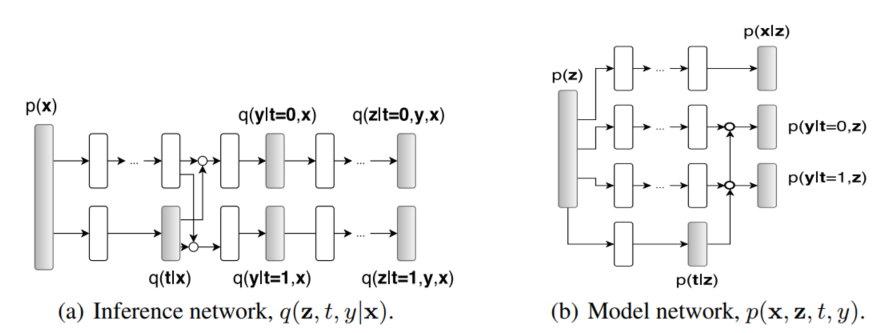

## Experimentos

Vamos testar os modelos inicialmente para o dataset **IHDP** para fins de ilustração do poder preditivo de cada um deles, sem se preocupar com hiperparâmetros. No caso para o modelo CEVAE, vamos utilizar hiperparâmetros fornecidos por [1]. 

Já para o dataset **Twins**, vamos realizar uma otimização de hiperparâmetros para $p^{\mathrm{flip}} = 0.25$. Em seguida, vamos variar $p^{\mathrm{flip}} \in [0.05, 0.1,...,0.5]$ e mensurar a performance dos modelos conforme o aumento de ruído nas proxies.

Vamos detalhar a seguir as métricas de performance.

### Definição das Métricas

Vamos calcular a métrica PEHE (precision in estimating heterogenous effects), sendo $$\mathrm{PEHE}=\frac{1}{N} \sum_{i=1}^{N}\left(\left(y_{i 1}-y_{i 0}\right)-\left(\hat{y}_{i 1}-\hat{y}_{i 0}\right)\right)^{2},$$ sendo $y_1$ e $y_0$ os resultados verdadeiros para tratamento $t = 1$ e $t = 0$, respectivamente. E $\hat{y}_1$ e $\hat{y}_0$ os resultados estimados pelo modelo 

Outra métrica é o erro absoluto do ATE (métrica definida na introdução) como $$\mathbb{Abs}\big(\{\mathbb{E}[Y(1)]-\mathbb{E}[Y(0)]\} - \{\hat{y}_1 - \hat{y}_0 \}\big),$$ sendo $\hat{y}_1 - \hat{y}_0$ o efeito médio de tratamento inferido.

Como resultado baseline de ATE, podemos calcular a diferença entre as médias do grupo tratado e controle, o que é uma abordagem naive de se calcular efeitos de tratamento, porém serve como resultado baseline.

In [9]:
def sqrt_PEHE(y: np.ndarray, hat_y: np.ndarray) -> float:
    """
    Precision in Estimation of Heterogeneous Effect(Numpy version).
    PEHE reflects the ability to capture individual variation in treatment effects.
    Args:
        y: expected outcome.
        hat_y: estimated outcome.
    """
    return np.sqrt(np.mean(((y[:, 1] - y[:, 0]) - (hat_y[:, 1] - hat_y[:, 0]) ** 2)))


def sqrt_PEHE_with_diff(y: np.ndarray, hat_y: np.ndarray) -> float:
    """
    Precision in Estimation of Heterogeneous Effect(Numpy version).
    PEHE reflects the ability to capture individual variation in treatment effects.
    Args:
        y: expected outcome.
        hat_y: estimated outcome difference.
    """
    return np.sqrt(np.mean(((y[:, 1] - y[:, 0]) - hat_y) ** 2))


def RPol(t: np.ndarray, y: np.ndarray, hat_y: np.ndarray) -> np.ndarray:
    """
    Policy risk(RPol).
    RPol is the average loss in value when treating according to the policy implied by an ITE estimator.
    Args:
        t: treatment vector.
        y: expected outcome.
        hat_y: estimated outcome.
    Output:
    """
    hat_t = np.sign(hat_y[:, 1] - hat_y[:, 0])
    hat_t = 0.5 * (hat_t + 1)
    new_hat_t = np.abs(1 - hat_t)

    # Intersection
    idx1 = hat_t * t
    idx0 = new_hat_t * (1 - t)

    # risk policy computation
    RPol1 = (np.sum(idx1 * y) / (np.sum(idx1) + 1e-8)) * np.mean(hat_t)
    RPol0 = (np.sum(idx0 * y) / (np.sum(idx0) + 1e-8)) * np.mean(new_hat_t)

    return 1 - (RPol1 + RPol0)


def ATE(y: np.ndarray, hat_y: np.ndarray) -> np.ndarray:
    """
    Average Treatment Effect.
    ATE measures what is the expected causal effect of the treatment across all individuals in the population.
    Args:
        y: expected outcome.
        hat_y: estimated outcome.
    """
    return np.abs(np.mean(y[:, 1] - y[:, 0]) - np.mean(hat_y[:, 1] - hat_y[:, 0]))

def ATE_with_diff(y: np.ndarray, hat_y: np.ndarray) -> np.ndarray:
    """
    Average Treatment Effect.
    ATE measures what is the expected causal effect of the treatment across all individuals in the population.
    Args:
        y: estimated outcome difference.
        hat_y: 
    """
    return np.abs(np.mean(y[:, 1] - y[:, 0]) - np.mean(hat_y))


def ATT(t: np.ndarray, y: np.ndarray, hat_y: np.ndarray) -> np.ndarray:
    """
    Average Treatment Effect on the Treated(ATT).
    ATT measures what is the expected causal effect of the treatment for individuals in the treatment group.
    Args:
        t: treatment vector.
        y: expected outcome.
        hat_y: estimated outcome.
    """
    # Original ATT
    ATT_value = np.sum(t * y) / (np.sum(t) + 1e-8) - np.sum((1 - t) * y) / (
        np.sum(1 - t) + 1e-8
    )
    # Estimated ATT
    ATT_estimate = np.sum(t * (hat_y[:, 1] - hat_y[:, 0])) / (np.sum(t) + 1e-8)
    return np.abs(ATT_value - ATT_estimate)


def mean_confidence_interval(
    data: np.ndarray, confidence: float = 0.95
) -> Tuple[float, float]:
    """
    Generate the mean and a confindence interval over observed data.
    Args:
        data: observed data
        confidence: confidence level
    """
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2.0, n - 1)

    return m, h

### Experimento - IHDP

Como descrito anteriormente, vamos rodar os modelos para o dataset **IHDP** com parâmetros default do LGBM e CEVAE com parâmetros descritos em [1].

Um cross-validation com $k = 4$ para mensurar as métricas

In [85]:
ihdp = IHDP()

In [86]:
baseline_ate = ATE_with_diff(np.vstack((ihdp.df['mu0'].values, ihdp.df['mu1'].values)).T,  ihdp.df.query('treatment == 1')['y_factual'].mean() - ihdp.df.query('treatment == 0')['y_factual'].mean())
print(f"Baseline Absolute Error ATE: {baseline_ate:.3f}")

Baseline Absolute Error ATE: 0.179


In [98]:
models = ['S', 'T', 'X', 'R', "CEVAE"]
ihdp_ite = []
ihdp_metrics = []
index = 0
for X_train, t_train, y_train, tau_train, y_potential_train, X_test, t_test, y_test, tau_test, y_potential_test in tqdm(ihdp.kfold()):
  # Treinando modelo propensity score 
  p_model = GradientBoostedPropensityModel()
  p_train = p_model.fit_predict(X_train, t_train)
  p_val = p_model.fit_predict(X_test, t_test)

  s_learner = BaseSRegressor(LGBMRegressor())
  s_learner.fit(X_train, t_train, y_train)
  s_ite_val = s_learner.predict(X_test)

  t_learner = BaseTRegressor(LGBMRegressor())
  t_learner.fit(X_train, t_train, y_train)
  t_ite_val = t_learner.predict(X_test, t_test, y_test)

  x_learner = BaseXRegressor(LGBMRegressor())
  x_learner.fit(X_train, t_train, y_train, p_train)
  x_ite_val = x_learner.predict(X_test, t_test, y_test, p_val)

  r_learner = BaseRRegressor(LGBMRegressor())
  r_learner.fit(X_train, t_train, y_train, p_train)
  r_ite_val = r_learner.predict(X_test, p_val)

  # cevae model settings
  outcome_dist = "normal"
  latent_dim = 20
  hidden_dim = 200
  num_epochs = 5
  batch_size = 1000
  learning_rate = 0.001
  learning_rate_decay = 0.01
  num_layers = 2

  cevae = CEVAE(outcome_dist=outcome_dist,
              latent_dim=latent_dim,
              hidden_dim=hidden_dim,
              num_epochs=num_epochs,
              batch_size=batch_size,
              learning_rate=learning_rate,
              learning_rate_decay=learning_rate_decay,
              num_layers=num_layers)
  
  losses = cevae.fit(X=torch.tensor(X_train.values, dtype=torch.float),
                   treatment=torch.tensor(t_train.values, dtype=torch.float),
                   y=torch.tensor(y_train.values, dtype=torch.float))
  
  ite_val = cevae.predict(X_test.values)

  ihdp_ite.append(pd.DataFrame({'It' : [index] * len(s_ite_val), 'S' : s_ite_val.ravel(), 'T' : t_ite_val.ravel(), 'X' : x_ite_val.ravel(), 'R' : r_ite_val.ravel(), 'CEVAE' : ite_val.ravel(),
                                 'tau' : tau_test.ravel(), 'w' : t_test.ravel(), 'y' : y_test.ravel()}))
  
  pehe = []
  ate = []
  for m in models:
    pehe.append(sqrt_PEHE_with_diff(y_potential_test, ihdp_ite[-1][m]))
    ate.append(ATE_with_diff(y_potential_test, ihdp_ite[-1][m]))

  ihdp_metrics.append(pd.DataFrame({'It' : [index] * len(models),
                                    'Model' : models, 
                                    'PEHE' :  pehe,
                                    'MAE' :   ate}))
  
  index += 1
ihdp_final_ite = pd.concat(ihdp_ite, ignore_index = True)
ihdp_final_metrics = pd.concat(ihdp_metrics, ignore_index = True)


0it [00:00, ?it/s]INFO 	 Training with 505 minibatches per epoch
DEBUG 	 step     0 loss = 832.683
DEBUG 	 step   100 loss = 39.153
DEBUG 	 step   200 loss = 23.9312
DEBUG 	 step   300 loss = 19.1641
DEBUG 	 step   400 loss = 16.4187
DEBUG 	 step   500 loss = 12.6188
DEBUG 	 step   600 loss = 11.6504
DEBUG 	 step   700 loss = 9.22284
DEBUG 	 step   800 loss = 7.24494
DEBUG 	 step   900 loss = 7.49341
DEBUG 	 step  1000 loss = 6.05991
DEBUG 	 step  1100 loss = 4.57513
DEBUG 	 step  1200 loss = 3.52952
DEBUG 	 step  1300 loss = 3.02417
DEBUG 	 step  1400 loss = 3.08124
DEBUG 	 step  1500 loss = 2.78069
DEBUG 	 step  1600 loss = 2.46825
DEBUG 	 step  1700 loss = 1.54639
DEBUG 	 step  1800 loss = 1.08972
DEBUG 	 step  1900 loss = 1.19182
DEBUG 	 step  2000 loss = 1.02809
DEBUG 	 step  2100 loss = 1.28434
DEBUG 	 step  2200 loss = 1.39537
DEBUG 	 step  2300 loss = 0.561804
DEBUG 	 step  2400 loss = 0.329605
DEBUG 	 step  2500 loss = 0.602695
INFO 	 Evaluating 169 minibatches
DEBUG 	 batch 

#### Resultados

##### Métricas dos Modelos

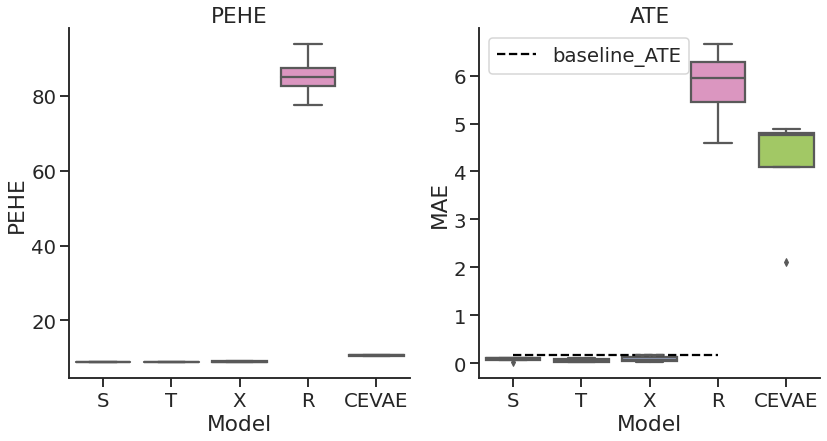

In [99]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))
sns.boxplot('Model', 'PEHE', data = ihdp_final_metrics, ax = ax[0],)
sns.boxplot('Model', 'MAE', data = ihdp_final_metrics, ax = ax[1],)
ax[1].hlines(y=baseline_ate, xmin = 0, xmax = 3, color='k', linestyle='--', label = 'baseline_ATE')
ax[1].legend()
ax[0].set_title('PEHE')
ax[1].set_title('ATE')
sns.despine()

Observamos que o R-Learner foi o pior modelo, com métricas muito piores que os demais. Os demais possuiram resultados similares para PEHE, ou seja, mensuram de forma parecida CATE. Entretanto, o erro do ATE simples para CEVAE é maior e parecido com R-Learner. Abaixo segue uma tabela para facilitar a análise das métricas


In [100]:
ihdp_final_metrics.groupby('Model').agg({'PEHE' : ['mean', 'std'], 'MAE' : ['mean', 'std']})


PEHE                 MAE          
            mean       std      mean       std
Model                                         
CEVAE  10.653503  0.166116  4.134773  1.342790
R      85.335029  6.646898  5.793265  0.877209
S       8.850415  0.108154  0.082132  0.040935
T       8.842155  0.104507  0.062433  0.040068
X       8.967486  0.112543  0.086982  0.070174

Vemos que o T-learner foi o melhor modelo em termos de previsão de CATE (métrirca PEHE) e para ATE.  O modelo R-Learner foi o pior em ambas as métricas. O modelo S-learner, apesar de simples, performou surpreendentemente bem. 

### Experimento - Twins



#### Otimização de Hiperparâmetros 

Para simplificar, vamos executar o tuning dos hiperparâmetros do LGBM de apenas um meta-learner e os reutilizar nos demais. Vamos utilizar a ferramenta Optuna para realizar otimização de hiperparâmetros do LGBM

In [22]:
twins = TWINS()

In [11]:
def objective(trial):
  param_grid = {
        "verbosity": -1,
        'seed' : 42,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256, step = 10),
        "max_depth": trial.suggest_categorical("max_depth", [-1, 1, 5, 10, 20, 50]),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "n_estimators": trial.suggest_categorical("n_estimators", [50, 100, 200, 500, 1000]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

  metrics = []
  for X_train, t_train, y_train, y_potential_train, X_test, t_test, y_test, y_potential_test in twins.kfold(proxy_prob = 0.25):
    s_learner = BaseSClassifier(LGBMClassifier(**param_grid))
    s_learner.fit_predict(X_train, t_train, y_train)
    s_ite_val = s_learner.predict(X_test)
    s_pehe = sqrt_PEHE_with_diff(y_potential_test, s_ite_val) 
    metrics.append(s_pehe)
  return np.mean(metrics)

study = optuna.create_study(direction="minimize")
joblib.dump(study, "study.pkl")
study.optimize(objective, n_trials=500)

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))


[I 2022-07-20 15:27:33,001] A new study created in memory with name: no-name-8e43d00f-6e16-4361-97a4-b2066e1a3768
[I 2022-07-20 15:27:38,731] Trial 0 finished with value: 0.32159859421883086 and parameters: {'learning_rate': 0.0307978892102816, 'num_leaves': 182, 'max_depth': 50, 'lambda_l1': 2.8227250490136624e-06, 'lambda_l2': 2.417533640064331e-07, 'min_gain_to_split': 2.8578905373682693, 'n_estimators': 1000, 'feature_fraction': 0.7478940698246029, 'bagging_fraction': 0.9845405839854797, 'bagging_freq': 1, 'min_child_samples': 43}. Best is trial 0 with value: 0.32159859421883086.
[I 2022-07-20 15:27:43,495] Trial 1 finished with value: 0.32143525584686217 and parameters: {'learning_rate': 0.049298469204333534, 'num_leaves': 172, 'max_depth': 50, 'lambda_l1': 1.2990278393658953e-07, 'lambda_l2': 0.692719530661224, 'min_gain_to_split': 5.86160658508311, 'n_estimators': 1000, 'feature_fraction': 0.6672904301111047, 'bagging_fraction': 0.9294708535356928, 'bagging_freq': 3, 'min_child_

Best trial:
  Value: 0.31914912416774655
  Params: 
    learning_rate: 0.02812567322619708
    num_leaves: 242
    max_depth: 5
    lambda_l1: 9.92625931812539
    lambda_l2: 1.0137223860963498e-08
    min_gain_to_split: 11.832361614875344
    n_estimators: 100
    feature_fraction: 0.5209929998666515
    bagging_fraction: 0.4620878998214824
    bagging_freq: 7
    min_child_samples: 15


Abaixo o histórico da otimização de hiperparâmetros

In [13]:
plot_optimization_history(study)

Os parâmetros que mais impactaram a performance do modelo. Interessante ver que min_gain_to_split, um parâmetro que pode ser visto como um regularizador ou early stopping, fez a maior diferença. 

In [16]:
plot_param_importances(study)

In [27]:
best_lgbm_params = {
    "learning_rate": 0.02812567322619708,
    "num_leaves": 242,
    "max_depth": 5,
    "lambda_l1": 9.92625931812539,
    "lambda_l2": 1.0137223860963498e-08,
    "min_gain_to_split": 11.832361614875344,
    "n_estimators": 100,
    "feature_fraction": 0.5209929998666515,
    "bagging_fraction": 0.4620878998214824,
    "bagging_freq": 7,
    "min_child_samples": 15,
}

Vamos usar estes parâmetros para todos os LGBMs dentro dos Meta-Learners

Agora vamos otimizar parâmetros do CEVAE

In [25]:
def objective(trial):
  param_grid = {
        "latent_dim": trial.suggest_categorical("latent_dim", [5, 10, 20, 30]),
        "hidden_dim": trial.suggest_categorical("hidden_dim", [30, 60, 100, 200, 400]),
        "num_epochs": trial.suggest_categorical("num_epochs", [5, 20, 50, 100, 200]),
        "batch_size": trial.suggest_categorical("batch_size", [250, 500, 1000]),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.001, 0.01, 0.005]),
        "num_layers": trial.suggest_categorical("num_layers", [2,3,4]),
    }

  metrics = []
  for X_train, t_train, y_train, y_potential_train, X_test, t_test, y_test, y_potential_test in twins.kfold(proxy_prob = 0.25):
    outcome_dist = "normal"
    latent_dim = param_grid["latent_dim"]
    hidden_dim = param_grid["hidden_dim"]
    num_epochs = param_grid["num_epochs"]
    batch_size = param_grid["batch_size"]
    learning_rate = param_grid["learning_rate"]
    learning_rate_decay = 0.01
    num_layers = param_grid["num_layers"]

    print(param_grid)

    cevae = CEVAE(outcome_dist=outcome_dist,
                latent_dim=latent_dim,
                hidden_dim=hidden_dim,
                num_epochs=num_epochs,
                batch_size=batch_size,
                learning_rate=learning_rate,
                learning_rate_decay=learning_rate_decay,
                num_layers=num_layers)

    losses = cevae.fit(X=torch.tensor(X_train.values, dtype=torch.float),
                    treatment=torch.tensor(t_train.values, dtype=torch.float),
                    y=torch.tensor(y_train.values, dtype=torch.float))

    ite_val = cevae.predict(X_test.values)
    s_pehe = sqrt_PEHE_with_diff(y_potential_test, ite_val.ravel()) 
    metrics.append(s_pehe)
  return np.mean(metrics)

study = optuna.create_study(direction="minimize")
joblib.dump(study, "study_cevae.pkl")
study.optimize(objective, n_trials=500)

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))


[I 2022-07-21 18:44:14,205] A new study created in memory with name: no-name-d22abee9-6d83-40f1-a92a-e1273f92b443
INFO:pyro.contrib.cevae:Training with 35 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 94.0955


{'latent_dim': 5, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 250, 'learning_rate': 0.001, 'num_layers': 3}


DEBUG:pyro.contrib.cevae:step   100 loss = 39.5668
DEBUG:pyro.contrib.cevae:step   200 loss = -4.65642
DEBUG:pyro.contrib.cevae:step   300 loss = -19.3642
DEBUG:pyro.contrib.cevae:step   400 loss = -28.1453
DEBUG:pyro.contrib.cevae:step   500 loss = -32.8404
DEBUG:pyro.contrib.cevae:step   600 loss = -37.2906
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0946493
DEBUG:pyro.contrib.cevae:batch ate = -0.0935601
DEBUG:pyro.contrib.cevae:batch ate = -0.0968632
DEBUG:pyro.contrib.cevae:batch ate = -0.0937019
DEBUG:pyro.contrib.cevae:batch ate = -0.0984902
DEBUG:pyro.contrib.cevae:batch ate = -0.0922168
DEBUG:pyro.contrib.cevae:batch ate = -0.0939738
DEBUG:pyro.contrib.cevae:batch ate = -0.0920687
DEBUG:pyro.contrib.cevae:batch ate = -0.0942628
DEBUG:pyro.contrib.cevae:batch ate = -0.0933564
DEBUG:pyro.contrib.cevae:batch ate = -0.0964556
DEBUG:pyro.contrib.cevae:batch ate = -0.0939219
INFO:pyro.contrib.cevae:Training with 35 minibatches per epoch


{'latent_dim': 5, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 250, 'learning_rate': 0.001, 'num_layers': 3}


DEBUG:pyro.contrib.cevae:step   100 loss = 83.9496
DEBUG:pyro.contrib.cevae:step   200 loss = 83.6406
DEBUG:pyro.contrib.cevae:step   300 loss = 78.5989
DEBUG:pyro.contrib.cevae:step   400 loss = 87.0831
DEBUG:pyro.contrib.cevae:step   500 loss = 77.0861
DEBUG:pyro.contrib.cevae:step   600 loss = 87.0309
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0721234
DEBUG:pyro.contrib.cevae:batch ate = 0.0739543
DEBUG:pyro.contrib.cevae:batch ate = 0.072874
DEBUG:pyro.contrib.cevae:batch ate = 0.0727237
DEBUG:pyro.contrib.cevae:batch ate = 0.0760222
DEBUG:pyro.contrib.cevae:batch ate = 0.074262
DEBUG:pyro.contrib.cevae:batch ate = 0.0733487
DEBUG:pyro.contrib.cevae:batch ate = 0.07276
DEBUG:pyro.contrib.cevae:batch ate = 0.0745394
DEBUG:pyro.contrib.cevae:batch ate = 0.0726917
DEBUG:pyro.contrib.cevae:batch ate = 0.0746527
DEBUG:pyro.contrib.cevae:batch ate = 0.0764345
INFO:pyro.contrib.cevae:Training with 35 minibatches per epoch
DEBUG:pyro.contrib.ce

{'latent_dim': 5, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 250, 'learning_rate': 0.001, 'num_layers': 3}


DEBUG:pyro.contrib.cevae:step   100 loss = 101.322
DEBUG:pyro.contrib.cevae:step   200 loss = 79.2476
DEBUG:pyro.contrib.cevae:step   300 loss = 79.7251
DEBUG:pyro.contrib.cevae:step   400 loss = 87.9814
DEBUG:pyro.contrib.cevae:step   500 loss = 94.3831
DEBUG:pyro.contrib.cevae:step   600 loss = 87.4988
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0224103
DEBUG:pyro.contrib.cevae:batch ate = -0.0209244
DEBUG:pyro.contrib.cevae:batch ate = -0.0223986
DEBUG:pyro.contrib.cevae:batch ate = -0.0228374
DEBUG:pyro.contrib.cevae:batch ate = -0.0219718
DEBUG:pyro.contrib.cevae:batch ate = -0.0223427
DEBUG:pyro.contrib.cevae:batch ate = -0.0238264
DEBUG:pyro.contrib.cevae:batch ate = -0.0227075
DEBUG:pyro.contrib.cevae:batch ate = -0.0236482
DEBUG:pyro.contrib.cevae:batch ate = -0.0218029
DEBUG:pyro.contrib.cevae:batch ate = -0.0224621
DEBUG:pyro.contrib.cevae:batch ate = -0.0218819
INFO:pyro.contrib.cevae:Training with 35 minibatches per epoch
DEBUG

{'latent_dim': 5, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 250, 'learning_rate': 0.001, 'num_layers': 3}


DEBUG:pyro.contrib.cevae:step   100 loss = 85.1597
DEBUG:pyro.contrib.cevae:step   200 loss = 85.7454
DEBUG:pyro.contrib.cevae:step   300 loss = 96.7012
DEBUG:pyro.contrib.cevae:step   400 loss = 94.379
DEBUG:pyro.contrib.cevae:step   500 loss = 77.745
DEBUG:pyro.contrib.cevae:step   600 loss = 84.8935
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0408243
DEBUG:pyro.contrib.cevae:batch ate = -0.042116
DEBUG:pyro.contrib.cevae:batch ate = -0.0427565
DEBUG:pyro.contrib.cevae:batch ate = -0.0417868
DEBUG:pyro.contrib.cevae:batch ate = -0.0413287
DEBUG:pyro.contrib.cevae:batch ate = -0.0416561
DEBUG:pyro.contrib.cevae:batch ate = -0.0422728
DEBUG:pyro.contrib.cevae:batch ate = -0.0423358
DEBUG:pyro.contrib.cevae:batch ate = -0.0415257
DEBUG:pyro.contrib.cevae:batch ate = -0.0422655
DEBUG:pyro.contrib.cevae:batch ate = -0.0418331
DEBUG:pyro.contrib.cevae:batch ate = -0.0426873
[I 2022-07-21 19:04:20,659] Trial 0 finished with value: 0.325215349052

{'latent_dim': 5, 'hidden_dim': 400, 'num_epochs': 100, 'batch_size': 250, 'learning_rate': 0.01, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 86.9597
DEBUG:pyro.contrib.cevae:step   200 loss = 90.751
DEBUG:pyro.contrib.cevae:step   300 loss = 82.2571
DEBUG:pyro.contrib.cevae:step   400 loss = 89.142
DEBUG:pyro.contrib.cevae:step   500 loss = 85.9606
DEBUG:pyro.contrib.cevae:step   600 loss = 84.3158
DEBUG:pyro.contrib.cevae:step   700 loss = 82.6703
DEBUG:pyro.contrib.cevae:step   800 loss = 90.9991
DEBUG:pyro.contrib.cevae:step   900 loss = 97.5024
DEBUG:pyro.contrib.cevae:step  1000 loss = 89.0966
DEBUG:pyro.contrib.cevae:step  1100 loss = 86.2755
DEBUG:pyro.contrib.cevae:step  1200 loss = 93.4702
DEBUG:pyro.contrib.cevae:step  1300 loss = 88.2584
DEBUG:pyro.contrib.cevae:step  1400 loss = 91.19
DEBUG:pyro.contrib.cevae:step  1500 loss = 82.9878
DEBUG:pyro.contrib.cevae:step  1600 loss = 83.9989
DEBUG:pyro.contrib.cevae:step  1700 loss = 79.7086
DEBUG:pyro.contrib.cevae:step  1800 loss = 79.8136
DEBUG:pyro.contrib.cevae:step  1900 loss = 87.8771
DEBUG:pyro.contrib.cevae:step  2000

{'latent_dim': 5, 'hidden_dim': 400, 'num_epochs': 100, 'batch_size': 250, 'learning_rate': 0.01, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 85.0182
DEBUG:pyro.contrib.cevae:step   200 loss = 85.9156
DEBUG:pyro.contrib.cevae:step   300 loss = 83.7482
DEBUG:pyro.contrib.cevae:step   400 loss = 104.579
DEBUG:pyro.contrib.cevae:step   500 loss = 99.4429
DEBUG:pyro.contrib.cevae:step   600 loss = 78.4785
DEBUG:pyro.contrib.cevae:step   700 loss = 87.009
DEBUG:pyro.contrib.cevae:step   800 loss = 82.9262
DEBUG:pyro.contrib.cevae:step   900 loss = 85.1018
DEBUG:pyro.contrib.cevae:step  1000 loss = 94.3084
DEBUG:pyro.contrib.cevae:step  1100 loss = 96.9621
DEBUG:pyro.contrib.cevae:step  1200 loss = 80.6585
DEBUG:pyro.contrib.cevae:step  1300 loss = 79.7107
DEBUG:pyro.contrib.cevae:step  1400 loss = 82.6074
DEBUG:pyro.contrib.cevae:step  1500 loss = 89.4704
DEBUG:pyro.contrib.cevae:step  1600 loss = 89.9602
DEBUG:pyro.contrib.cevae:step  1700 loss = 84.6235
DEBUG:pyro.contrib.cevae:step  1800 loss = 86.0822
DEBUG:pyro.contrib.cevae:step  1900 loss = 90.6101
DEBUG:pyro.contrib.cevae:step  2

{'latent_dim': 5, 'hidden_dim': 400, 'num_epochs': 100, 'batch_size': 250, 'learning_rate': 0.01, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 80.7013
DEBUG:pyro.contrib.cevae:step   200 loss = 95.634
DEBUG:pyro.contrib.cevae:step   300 loss = 90.5894
DEBUG:pyro.contrib.cevae:step   400 loss = 81.9512
DEBUG:pyro.contrib.cevae:step   500 loss = 87.3806
DEBUG:pyro.contrib.cevae:step   600 loss = 83.1124
DEBUG:pyro.contrib.cevae:step   700 loss = 78.9241
DEBUG:pyro.contrib.cevae:step   800 loss = 85.4019
DEBUG:pyro.contrib.cevae:step   900 loss = 91.907
DEBUG:pyro.contrib.cevae:step  1000 loss = 85.4414
DEBUG:pyro.contrib.cevae:step  1100 loss = 96.7948
DEBUG:pyro.contrib.cevae:step  1200 loss = 89.8043
DEBUG:pyro.contrib.cevae:step  1300 loss = 87.2421
DEBUG:pyro.contrib.cevae:step  1400 loss = 83.9186
DEBUG:pyro.contrib.cevae:step  1500 loss = 96.9295
DEBUG:pyro.contrib.cevae:step  1600 loss = 88.2126
DEBUG:pyro.contrib.cevae:step  1700 loss = 85.7985
DEBUG:pyro.contrib.cevae:step  1800 loss = 85.0897
DEBUG:pyro.contrib.cevae:step  1900 loss = 85.2066
DEBUG:pyro.contrib.cevae:step  20

{'latent_dim': 5, 'hidden_dim': 400, 'num_epochs': 100, 'batch_size': 250, 'learning_rate': 0.01, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 86.2547
DEBUG:pyro.contrib.cevae:step   200 loss = 82.0303
DEBUG:pyro.contrib.cevae:step   300 loss = 83.7921
DEBUG:pyro.contrib.cevae:step   400 loss = 82.201
DEBUG:pyro.contrib.cevae:step   500 loss = 88.4872
DEBUG:pyro.contrib.cevae:step   600 loss = 88.5207
DEBUG:pyro.contrib.cevae:step   700 loss = 90.5221
DEBUG:pyro.contrib.cevae:step   800 loss = 83.6341
DEBUG:pyro.contrib.cevae:step   900 loss = 80.5811
DEBUG:pyro.contrib.cevae:step  1000 loss = 153.026
DEBUG:pyro.contrib.cevae:step  1100 loss = 98.5731
DEBUG:pyro.contrib.cevae:step  1200 loss = 87.0737
DEBUG:pyro.contrib.cevae:step  1300 loss = 83.6285
DEBUG:pyro.contrib.cevae:step  1400 loss = 161.23
DEBUG:pyro.contrib.cevae:step  1500 loss = 83.2764
DEBUG:pyro.contrib.cevae:step  1600 loss = 84.5776
DEBUG:pyro.contrib.cevae:step  1700 loss = 81.8641
DEBUG:pyro.contrib.cevae:step  1800 loss = 94.8172
DEBUG:pyro.contrib.cevae:step  1900 loss = 90.5927
DEBUG:pyro.contrib.cevae:step  20

{'latent_dim': 5, 'hidden_dim': 200, 'num_epochs': 5, 'batch_size': 500, 'learning_rate': 0.001, 'num_layers': 3}


INFO:pyro.contrib.cevae:Evaluating 6 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0518034
DEBUG:pyro.contrib.cevae:batch ate = -0.0528418
DEBUG:pyro.contrib.cevae:batch ate = -0.0523911
DEBUG:pyro.contrib.cevae:batch ate = -0.0521133
DEBUG:pyro.contrib.cevae:batch ate = -0.051114
DEBUG:pyro.contrib.cevae:batch ate = -0.0511093
INFO:pyro.contrib.cevae:Training with 18 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 90.1106


{'latent_dim': 5, 'hidden_dim': 200, 'num_epochs': 5, 'batch_size': 500, 'learning_rate': 0.001, 'num_layers': 3}


INFO:pyro.contrib.cevae:Evaluating 6 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.163938
DEBUG:pyro.contrib.cevae:batch ate = -0.165056
DEBUG:pyro.contrib.cevae:batch ate = -0.16484
DEBUG:pyro.contrib.cevae:batch ate = -0.164066
DEBUG:pyro.contrib.cevae:batch ate = -0.16577
DEBUG:pyro.contrib.cevae:batch ate = -0.165202
INFO:pyro.contrib.cevae:Training with 18 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 85.3132


{'latent_dim': 5, 'hidden_dim': 200, 'num_epochs': 5, 'batch_size': 500, 'learning_rate': 0.001, 'num_layers': 3}


INFO:pyro.contrib.cevae:Evaluating 6 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0218892
DEBUG:pyro.contrib.cevae:batch ate = 0.0202835
DEBUG:pyro.contrib.cevae:batch ate = 0.021658
DEBUG:pyro.contrib.cevae:batch ate = 0.0210081
DEBUG:pyro.contrib.cevae:batch ate = 0.0187955
DEBUG:pyro.contrib.cevae:batch ate = 0.0192436
INFO:pyro.contrib.cevae:Training with 18 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 85.7284


{'latent_dim': 5, 'hidden_dim': 200, 'num_epochs': 5, 'batch_size': 500, 'learning_rate': 0.001, 'num_layers': 3}


INFO:pyro.contrib.cevae:Evaluating 6 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0571329
DEBUG:pyro.contrib.cevae:batch ate = 0.0551351
DEBUG:pyro.contrib.cevae:batch ate = 0.0577049
DEBUG:pyro.contrib.cevae:batch ate = 0.0562154
DEBUG:pyro.contrib.cevae:batch ate = 0.0559458
DEBUG:pyro.contrib.cevae:batch ate = 0.0578267
[I 2022-07-21 19:28:50,507] Trial 2 finished with value: 0.3307040962676535 and parameters: {'latent_dim': 5, 'hidden_dim': 200, 'num_epochs': 5, 'batch_size': 500, 'learning_rate': 0.001, 'num_layers': 3}. Best is trial 0 with value: 0.3252153490525882.
INFO:pyro.contrib.cevae:Training with 18 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 89.2901


{'latent_dim': 30, 'hidden_dim': 200, 'num_epochs': 5, 'batch_size': 500, 'learning_rate': 0.001, 'num_layers': 2}


INFO:pyro.contrib.cevae:Evaluating 6 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.00958477
DEBUG:pyro.contrib.cevae:batch ate = 0.0135041
DEBUG:pyro.contrib.cevae:batch ate = 0.0128047
DEBUG:pyro.contrib.cevae:batch ate = 0.0110954
DEBUG:pyro.contrib.cevae:batch ate = 0.011403
DEBUG:pyro.contrib.cevae:batch ate = 0.0112706
INFO:pyro.contrib.cevae:Training with 18 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 85.233


{'latent_dim': 30, 'hidden_dim': 200, 'num_epochs': 5, 'batch_size': 500, 'learning_rate': 0.001, 'num_layers': 2}


INFO:pyro.contrib.cevae:Evaluating 6 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.08901
DEBUG:pyro.contrib.cevae:batch ate = 0.0895883
DEBUG:pyro.contrib.cevae:batch ate = 0.0841902
DEBUG:pyro.contrib.cevae:batch ate = 0.0900666
DEBUG:pyro.contrib.cevae:batch ate = 0.0861794
DEBUG:pyro.contrib.cevae:batch ate = 0.0939898
INFO:pyro.contrib.cevae:Training with 18 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 87.8824


{'latent_dim': 30, 'hidden_dim': 200, 'num_epochs': 5, 'batch_size': 500, 'learning_rate': 0.001, 'num_layers': 2}


INFO:pyro.contrib.cevae:Evaluating 6 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.00380538
DEBUG:pyro.contrib.cevae:batch ate = 0.00529835
DEBUG:pyro.contrib.cevae:batch ate = 0.00342079
DEBUG:pyro.contrib.cevae:batch ate = 0.00410805
DEBUG:pyro.contrib.cevae:batch ate = 0.000692946
DEBUG:pyro.contrib.cevae:batch ate = 0.00395902
INFO:pyro.contrib.cevae:Training with 18 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 90.8277


{'latent_dim': 30, 'hidden_dim': 200, 'num_epochs': 5, 'batch_size': 500, 'learning_rate': 0.001, 'num_layers': 2}


INFO:pyro.contrib.cevae:Evaluating 6 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0994597
DEBUG:pyro.contrib.cevae:batch ate = 0.0987782
DEBUG:pyro.contrib.cevae:batch ate = 0.0973873
DEBUG:pyro.contrib.cevae:batch ate = 0.0963294
DEBUG:pyro.contrib.cevae:batch ate = 0.10148
DEBUG:pyro.contrib.cevae:batch ate = 0.100222
[I 2022-07-21 19:33:01,460] Trial 3 finished with value: 0.33420833892508006 and parameters: {'latent_dim': 30, 'hidden_dim': 200, 'num_epochs': 5, 'batch_size': 500, 'learning_rate': 0.001, 'num_layers': 2}. Best is trial 0 with value: 0.3252153490525882.
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 92.5391


{'latent_dim': 10, 'hidden_dim': 30, 'num_epochs': 100, 'batch_size': 1000, 'learning_rate': 0.001, 'num_layers': 3}


DEBUG:pyro.contrib.cevae:step   100 loss = 88.6678
DEBUG:pyro.contrib.cevae:step   200 loss = 86.2412
DEBUG:pyro.contrib.cevae:step   300 loss = 95.41
DEBUG:pyro.contrib.cevae:step   400 loss = 89.9846
DEBUG:pyro.contrib.cevae:step   500 loss = 90.9623
DEBUG:pyro.contrib.cevae:step   600 loss = 87.5223
DEBUG:pyro.contrib.cevae:step   700 loss = 98.7471
DEBUG:pyro.contrib.cevae:step   800 loss = 88.2156
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.138571
DEBUG:pyro.contrib.cevae:batch ate = 0.139432
DEBUG:pyro.contrib.cevae:batch ate = 0.138259
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch


{'latent_dim': 10, 'hidden_dim': 30, 'num_epochs': 100, 'batch_size': 1000, 'learning_rate': 0.001, 'num_layers': 3}


DEBUG:pyro.contrib.cevae:step     0 loss = 87.9758
DEBUG:pyro.contrib.cevae:step   100 loss = 94.9116
DEBUG:pyro.contrib.cevae:step   200 loss = 102.949
DEBUG:pyro.contrib.cevae:step   300 loss = 86.3004
DEBUG:pyro.contrib.cevae:step   400 loss = 88.4696
DEBUG:pyro.contrib.cevae:step   500 loss = 82.9256
DEBUG:pyro.contrib.cevae:step   600 loss = 118.107
DEBUG:pyro.contrib.cevae:step   700 loss = 110.811
DEBUG:pyro.contrib.cevae:step   800 loss = 82.9768
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0873877
DEBUG:pyro.contrib.cevae:batch ate = 0.0868879
DEBUG:pyro.contrib.cevae:batch ate = 0.0880745
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 90.543


{'latent_dim': 10, 'hidden_dim': 30, 'num_epochs': 100, 'batch_size': 1000, 'learning_rate': 0.001, 'num_layers': 3}


DEBUG:pyro.contrib.cevae:step   100 loss = 89.6055
DEBUG:pyro.contrib.cevae:step   200 loss = 85.8049
DEBUG:pyro.contrib.cevae:step   300 loss = 88.617
DEBUG:pyro.contrib.cevae:step   400 loss = 90.4017
DEBUG:pyro.contrib.cevae:step   500 loss = 86.9503
DEBUG:pyro.contrib.cevae:step   600 loss = 88.4764
DEBUG:pyro.contrib.cevae:step   700 loss = 89.0068
DEBUG:pyro.contrib.cevae:step   800 loss = 87.5504
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.131109
DEBUG:pyro.contrib.cevae:batch ate = 0.130918
DEBUG:pyro.contrib.cevae:batch ate = 0.130495
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 100.208


{'latent_dim': 10, 'hidden_dim': 30, 'num_epochs': 100, 'batch_size': 1000, 'learning_rate': 0.001, 'num_layers': 3}


DEBUG:pyro.contrib.cevae:step   100 loss = 88.8024
DEBUG:pyro.contrib.cevae:step   200 loss = 90.4401
DEBUG:pyro.contrib.cevae:step   300 loss = 92.5506
DEBUG:pyro.contrib.cevae:step   400 loss = 88.9938
DEBUG:pyro.contrib.cevae:step   500 loss = 91.5989
DEBUG:pyro.contrib.cevae:step   600 loss = 92.6952
DEBUG:pyro.contrib.cevae:step   700 loss = 97.4564
DEBUG:pyro.contrib.cevae:step   800 loss = 89.775
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.235225
DEBUG:pyro.contrib.cevae:batch ate = -0.235994
DEBUG:pyro.contrib.cevae:batch ate = -0.236067
[I 2022-07-21 19:37:34,190] Trial 4 finished with value: 0.3585773079417437 and parameters: {'latent_dim': 10, 'hidden_dim': 30, 'num_epochs': 100, 'batch_size': 1000, 'learning_rate': 0.001, 'num_layers': 3}. Best is trial 0 with value: 0.3252153490525882.
INFO:pyro.contrib.cevae:Training with 35 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 81.8178


{'latent_dim': 10, 'hidden_dim': 100, 'num_epochs': 100, 'batch_size': 250, 'learning_rate': 0.01, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 2802.15
DEBUG:pyro.contrib.cevae:step   200 loss = 67.5046
DEBUG:pyro.contrib.cevae:step   300 loss = 337.96
DEBUG:pyro.contrib.cevae:step   400 loss = -16.1174
DEBUG:pyro.contrib.cevae:step   500 loss = -27.1525
DEBUG:pyro.contrib.cevae:step   600 loss = -15.0805
DEBUG:pyro.contrib.cevae:step   700 loss = -30.948
DEBUG:pyro.contrib.cevae:step   800 loss = -29.2255
DEBUG:pyro.contrib.cevae:step   900 loss = -37.8271
DEBUG:pyro.contrib.cevae:step  1000 loss = -33.419
DEBUG:pyro.contrib.cevae:step  1100 loss = -47.2819
DEBUG:pyro.contrib.cevae:step  1200 loss = -51.1846
DEBUG:pyro.contrib.cevae:step  1300 loss = -55.0022
DEBUG:pyro.contrib.cevae:step  1400 loss = -52.2673
DEBUG:pyro.contrib.cevae:step  1500 loss = -54.0331
DEBUG:pyro.contrib.cevae:step  1600 loss = -53.6546
DEBUG:pyro.contrib.cevae:step  1700 loss = -66.3926
DEBUG:pyro.contrib.cevae:step  1800 loss = -57.98
DEBUG:pyro.contrib.cevae:step  1900 loss = -58.4071
DEBUG:pyro.contrib.c

{'latent_dim': 10, 'hidden_dim': 100, 'num_epochs': 100, 'batch_size': 250, 'learning_rate': 0.01, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 80.6398
DEBUG:pyro.contrib.cevae:step   200 loss = 92.8162
DEBUG:pyro.contrib.cevae:step   300 loss = 91.1451
DEBUG:pyro.contrib.cevae:step   400 loss = 75.9578
DEBUG:pyro.contrib.cevae:step   500 loss = 90.4862
DEBUG:pyro.contrib.cevae:step   600 loss = 79.7688
DEBUG:pyro.contrib.cevae:step   700 loss = 89.9161
DEBUG:pyro.contrib.cevae:step   800 loss = 84.0482
DEBUG:pyro.contrib.cevae:step   900 loss = 82.1719
DEBUG:pyro.contrib.cevae:step  1000 loss = 80.2171
DEBUG:pyro.contrib.cevae:step  1100 loss = 86.9488
DEBUG:pyro.contrib.cevae:step  1200 loss = 86.6381
DEBUG:pyro.contrib.cevae:step  1300 loss = 83.706
DEBUG:pyro.contrib.cevae:step  1400 loss = 83.0711
DEBUG:pyro.contrib.cevae:step  1500 loss = 92.5697
DEBUG:pyro.contrib.cevae:step  1600 loss = 84.8594
DEBUG:pyro.contrib.cevae:step  1700 loss = 88.043
DEBUG:pyro.contrib.cevae:step  1800 loss = 92.0085
DEBUG:pyro.contrib.cevae:step  1900 loss = 80.8303
DEBUG:pyro.contrib.cevae:step  20

{'latent_dim': 10, 'hidden_dim': 100, 'num_epochs': 100, 'batch_size': 250, 'learning_rate': 0.01, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 82.9165
DEBUG:pyro.contrib.cevae:step   200 loss = 88.6516
DEBUG:pyro.contrib.cevae:step   300 loss = 92.0728
DEBUG:pyro.contrib.cevae:step   400 loss = 90.455
DEBUG:pyro.contrib.cevae:step   500 loss = 76.7462
DEBUG:pyro.contrib.cevae:step   600 loss = 98.8632
DEBUG:pyro.contrib.cevae:step   700 loss = 81.702
DEBUG:pyro.contrib.cevae:step   800 loss = 83.4917
DEBUG:pyro.contrib.cevae:step   900 loss = 84.4723
DEBUG:pyro.contrib.cevae:step  1000 loss = 83.4152
DEBUG:pyro.contrib.cevae:step  1100 loss = 98.5091
DEBUG:pyro.contrib.cevae:step  1200 loss = 90.1321
DEBUG:pyro.contrib.cevae:step  1300 loss = 92.0644
DEBUG:pyro.contrib.cevae:step  1400 loss = 87.0438
DEBUG:pyro.contrib.cevae:step  1500 loss = 95.7303
DEBUG:pyro.contrib.cevae:step  1600 loss = 79.5045
DEBUG:pyro.contrib.cevae:step  1700 loss = 100.869
DEBUG:pyro.contrib.cevae:step  1800 loss = 88.5719
DEBUG:pyro.contrib.cevae:step  1900 loss = 81.4441
DEBUG:pyro.contrib.cevae:step  20

{'latent_dim': 10, 'hidden_dim': 100, 'num_epochs': 100, 'batch_size': 250, 'learning_rate': 0.01, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 91.8649
DEBUG:pyro.contrib.cevae:step   200 loss = 114.148
DEBUG:pyro.contrib.cevae:step   300 loss = 95.5364
DEBUG:pyro.contrib.cevae:step   400 loss = 92.4687
DEBUG:pyro.contrib.cevae:step   500 loss = 96.0327
DEBUG:pyro.contrib.cevae:step   600 loss = 83.861
DEBUG:pyro.contrib.cevae:step   700 loss = 97.8949
DEBUG:pyro.contrib.cevae:step   800 loss = 90.6224
DEBUG:pyro.contrib.cevae:step   900 loss = 91.7682
DEBUG:pyro.contrib.cevae:step  1000 loss = 94.4412
DEBUG:pyro.contrib.cevae:step  1100 loss = 85.148
DEBUG:pyro.contrib.cevae:step  1200 loss = 96.516
DEBUG:pyro.contrib.cevae:step  1300 loss = 81.0007
DEBUG:pyro.contrib.cevae:step  1400 loss = 83.9552
DEBUG:pyro.contrib.cevae:step  1500 loss = 92.7202
DEBUG:pyro.contrib.cevae:step  1600 loss = 83.2819
DEBUG:pyro.contrib.cevae:step  1700 loss = 82.4348
DEBUG:pyro.contrib.cevae:step  1800 loss = 101.625
DEBUG:pyro.contrib.cevae:step  1900 loss = 80.6713
DEBUG:pyro.contrib.cevae:step  200

{'latent_dim': 30, 'hidden_dim': 100, 'num_epochs': 5, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 2}


INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0475004
DEBUG:pyro.contrib.cevae:batch ate = 0.0478629
DEBUG:pyro.contrib.cevae:batch ate = 0.0465135
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 93.3438


{'latent_dim': 30, 'hidden_dim': 100, 'num_epochs': 5, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 2}


INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0380804
DEBUG:pyro.contrib.cevae:batch ate = 0.0380355
DEBUG:pyro.contrib.cevae:batch ate = 0.0395621
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 97.2016


{'latent_dim': 30, 'hidden_dim': 100, 'num_epochs': 5, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 2}


INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0726081
DEBUG:pyro.contrib.cevae:batch ate = 0.0751447
DEBUG:pyro.contrib.cevae:batch ate = 0.0724792
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 100.534


{'latent_dim': 30, 'hidden_dim': 100, 'num_epochs': 5, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 2}


INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0310663
DEBUG:pyro.contrib.cevae:batch ate = -0.0296692
DEBUG:pyro.contrib.cevae:batch ate = -0.0238922
[I 2022-07-21 19:56:49,243] Trial 6 finished with value: 0.33023105705844097 and parameters: {'latent_dim': 30, 'hidden_dim': 100, 'num_epochs': 5, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 2}. Best is trial 0 with value: 0.3252153490525882.
INFO:pyro.contrib.cevae:Training with 35 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 88.9059


{'latent_dim': 10, 'hidden_dim': 100, 'num_epochs': 100, 'batch_size': 250, 'learning_rate': 0.001, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 90.2125
DEBUG:pyro.contrib.cevae:step   200 loss = 83.687
DEBUG:pyro.contrib.cevae:step   300 loss = 99.1259
DEBUG:pyro.contrib.cevae:step   400 loss = 90.6354
DEBUG:pyro.contrib.cevae:step   500 loss = 85.4366
DEBUG:pyro.contrib.cevae:step   600 loss = 89.508
DEBUG:pyro.contrib.cevae:step   700 loss = 95.1315
DEBUG:pyro.contrib.cevae:step   800 loss = 81.3945
DEBUG:pyro.contrib.cevae:step   900 loss = 83.9963
DEBUG:pyro.contrib.cevae:step  1000 loss = 86.9534
DEBUG:pyro.contrib.cevae:step  1100 loss = 87.2554
DEBUG:pyro.contrib.cevae:step  1200 loss = 89.5763
DEBUG:pyro.contrib.cevae:step  1300 loss = 91.0335
DEBUG:pyro.contrib.cevae:step  1400 loss = 82.7292
DEBUG:pyro.contrib.cevae:step  1500 loss = 96.1049
DEBUG:pyro.contrib.cevae:step  1600 loss = 89.3525
DEBUG:pyro.contrib.cevae:step  1700 loss = 90.0384
DEBUG:pyro.contrib.cevae:step  1800 loss = 83.1506
DEBUG:pyro.contrib.cevae:step  1900 loss = 95.7453
DEBUG:pyro.contrib.cevae:step  20

{'latent_dim': 10, 'hidden_dim': 100, 'num_epochs': 100, 'batch_size': 250, 'learning_rate': 0.001, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 89.1856
DEBUG:pyro.contrib.cevae:step   200 loss = 87.5989
DEBUG:pyro.contrib.cevae:step   300 loss = 94.8849
DEBUG:pyro.contrib.cevae:step   400 loss = 86.2357
DEBUG:pyro.contrib.cevae:step   500 loss = 97.7523
DEBUG:pyro.contrib.cevae:step   600 loss = 92.3577
DEBUG:pyro.contrib.cevae:step   700 loss = 94.755
DEBUG:pyro.contrib.cevae:step   800 loss = 88.5318
DEBUG:pyro.contrib.cevae:step   900 loss = 87.1589
DEBUG:pyro.contrib.cevae:step  1000 loss = 87.3051
DEBUG:pyro.contrib.cevae:step  1100 loss = 101.586
DEBUG:pyro.contrib.cevae:step  1200 loss = 106.259
DEBUG:pyro.contrib.cevae:step  1300 loss = 82.9037
DEBUG:pyro.contrib.cevae:step  1400 loss = 88.8471
DEBUG:pyro.contrib.cevae:step  1500 loss = 84.9418
DEBUG:pyro.contrib.cevae:step  1600 loss = 86.9746
DEBUG:pyro.contrib.cevae:step  1700 loss = 86.8228
DEBUG:pyro.contrib.cevae:step  1800 loss = 95.0906
DEBUG:pyro.contrib.cevae:step  1900 loss = 89.7131
DEBUG:pyro.contrib.cevae:step  2

{'latent_dim': 10, 'hidden_dim': 100, 'num_epochs': 100, 'batch_size': 250, 'learning_rate': 0.001, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 91.6065
DEBUG:pyro.contrib.cevae:step   200 loss = 86.8211
DEBUG:pyro.contrib.cevae:step   300 loss = 84.1501
DEBUG:pyro.contrib.cevae:step   400 loss = 89.1683
DEBUG:pyro.contrib.cevae:step   500 loss = 91.414
DEBUG:pyro.contrib.cevae:step   600 loss = 90.1938
DEBUG:pyro.contrib.cevae:step   700 loss = 92.0816
DEBUG:pyro.contrib.cevae:step   800 loss = 87.5796
DEBUG:pyro.contrib.cevae:step   900 loss = 107.512
DEBUG:pyro.contrib.cevae:step  1000 loss = 95.2986
DEBUG:pyro.contrib.cevae:step  1100 loss = 88.5455
DEBUG:pyro.contrib.cevae:step  1200 loss = 98.0035
DEBUG:pyro.contrib.cevae:step  1300 loss = 85.7194
DEBUG:pyro.contrib.cevae:step  1400 loss = 82.1701
DEBUG:pyro.contrib.cevae:step  1500 loss = 88.3834
DEBUG:pyro.contrib.cevae:step  1600 loss = 91.2322
DEBUG:pyro.contrib.cevae:step  1700 loss = 87.1885
DEBUG:pyro.contrib.cevae:step  1800 loss = 90.79
DEBUG:pyro.contrib.cevae:step  1900 loss = 83.958
DEBUG:pyro.contrib.cevae:step  2000

{'latent_dim': 10, 'hidden_dim': 100, 'num_epochs': 100, 'batch_size': 250, 'learning_rate': 0.001, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 82.9228
DEBUG:pyro.contrib.cevae:step   200 loss = 103.599
DEBUG:pyro.contrib.cevae:step   300 loss = 89.0999
DEBUG:pyro.contrib.cevae:step   400 loss = 96.2407
DEBUG:pyro.contrib.cevae:step   500 loss = 83.2314
DEBUG:pyro.contrib.cevae:step   600 loss = 83.3953
DEBUG:pyro.contrib.cevae:step   700 loss = 91.9555
DEBUG:pyro.contrib.cevae:step   800 loss = 90.8738
DEBUG:pyro.contrib.cevae:step   900 loss = 85.0343
DEBUG:pyro.contrib.cevae:step  1000 loss = 108.424
DEBUG:pyro.contrib.cevae:step  1100 loss = 96.3292
DEBUG:pyro.contrib.cevae:step  1200 loss = 95.6932
DEBUG:pyro.contrib.cevae:step  1300 loss = 98.9757
DEBUG:pyro.contrib.cevae:step  1400 loss = 85.2388
DEBUG:pyro.contrib.cevae:step  1500 loss = 78.1273
DEBUG:pyro.contrib.cevae:step  1600 loss = 88.7688
DEBUG:pyro.contrib.cevae:step  1700 loss = 103.07
DEBUG:pyro.contrib.cevae:step  1800 loss = 118.701
DEBUG:pyro.contrib.cevae:step  1900 loss = 104.478
DEBUG:pyro.contrib.cevae:step  2

{'latent_dim': 30, 'hidden_dim': 60, 'num_epochs': 50, 'batch_size': 1000, 'learning_rate': 0.01, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 107.985
DEBUG:pyro.contrib.cevae:step   200 loss = 96.0265
DEBUG:pyro.contrib.cevae:step   300 loss = 94.9866
DEBUG:pyro.contrib.cevae:step   400 loss = 92.1066
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.111621
DEBUG:pyro.contrib.cevae:batch ate = -0.109229
DEBUG:pyro.contrib.cevae:batch ate = -0.108535
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 90.8262


{'latent_dim': 30, 'hidden_dim': 60, 'num_epochs': 50, 'batch_size': 1000, 'learning_rate': 0.01, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 91.7673
DEBUG:pyro.contrib.cevae:step   200 loss = 114.284
DEBUG:pyro.contrib.cevae:step   300 loss = 95.8408
DEBUG:pyro.contrib.cevae:step   400 loss = 99.5904
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.105344
DEBUG:pyro.contrib.cevae:batch ate = 0.100984
DEBUG:pyro.contrib.cevae:batch ate = 0.101448
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 92.5406


{'latent_dim': 30, 'hidden_dim': 60, 'num_epochs': 50, 'batch_size': 1000, 'learning_rate': 0.01, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 92.2883
DEBUG:pyro.contrib.cevae:step   200 loss = 92.6459
DEBUG:pyro.contrib.cevae:step   300 loss = 97.924
DEBUG:pyro.contrib.cevae:step   400 loss = 98.8947
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0421552
DEBUG:pyro.contrib.cevae:batch ate = -0.0427226
DEBUG:pyro.contrib.cevae:batch ate = -0.0420121
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 89.4001


{'latent_dim': 30, 'hidden_dim': 60, 'num_epochs': 50, 'batch_size': 1000, 'learning_rate': 0.01, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 106.092
DEBUG:pyro.contrib.cevae:step   200 loss = 93.83
DEBUG:pyro.contrib.cevae:step   300 loss = 100.435
DEBUG:pyro.contrib.cevae:step   400 loss = 91.9076
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.104148
DEBUG:pyro.contrib.cevae:batch ate = -0.105502
DEBUG:pyro.contrib.cevae:batch ate = -0.10281
[I 2022-07-21 20:07:52,846] Trial 8 finished with value: 0.3337999537719768 and parameters: {'latent_dim': 30, 'hidden_dim': 60, 'num_epochs': 50, 'batch_size': 1000, 'learning_rate': 0.01, 'num_layers': 2}. Best is trial 0 with value: 0.3252153490525882.
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch


{'latent_dim': 20, 'hidden_dim': 100, 'num_epochs': 200, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step     0 loss = 91.894
DEBUG:pyro.contrib.cevae:step   100 loss = 87.4042
DEBUG:pyro.contrib.cevae:step   200 loss = 99.8807
DEBUG:pyro.contrib.cevae:step   300 loss = 91.6675
DEBUG:pyro.contrib.cevae:step   400 loss = 90.8033
DEBUG:pyro.contrib.cevae:step   500 loss = 85.3849
DEBUG:pyro.contrib.cevae:step   600 loss = 95.9299
DEBUG:pyro.contrib.cevae:step   700 loss = 88.1235
DEBUG:pyro.contrib.cevae:step   800 loss = 92.263
DEBUG:pyro.contrib.cevae:step   900 loss = 102.098
DEBUG:pyro.contrib.cevae:step  1000 loss = 92.9486
DEBUG:pyro.contrib.cevae:step  1100 loss = 92.9336
DEBUG:pyro.contrib.cevae:step  1200 loss = 92.0027
DEBUG:pyro.contrib.cevae:step  1300 loss = 93.6373
DEBUG:pyro.contrib.cevae:step  1400 loss = 91.6585
DEBUG:pyro.contrib.cevae:step  1500 loss = 92.6919
DEBUG:pyro.contrib.cevae:step  1600 loss = 89.8059
DEBUG:pyro.contrib.cevae:step  1700 loss = 112.258
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate 

{'latent_dim': 20, 'hidden_dim': 100, 'num_epochs': 200, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 106.407
DEBUG:pyro.contrib.cevae:step   200 loss = 95.1628
DEBUG:pyro.contrib.cevae:step   300 loss = 115.686
DEBUG:pyro.contrib.cevae:step   400 loss = 98.5962
DEBUG:pyro.contrib.cevae:step   500 loss = 114.477
DEBUG:pyro.contrib.cevae:step   600 loss = 93.9525
DEBUG:pyro.contrib.cevae:step   700 loss = 88.7775
DEBUG:pyro.contrib.cevae:step   800 loss = 86.5777
DEBUG:pyro.contrib.cevae:step   900 loss = 92.211
DEBUG:pyro.contrib.cevae:step  1000 loss = 91.9268
DEBUG:pyro.contrib.cevae:step  1100 loss = 91.967
DEBUG:pyro.contrib.cevae:step  1200 loss = 112.647
DEBUG:pyro.contrib.cevae:step  1300 loss = 86.2931
DEBUG:pyro.contrib.cevae:step  1400 loss = 107.507
DEBUG:pyro.contrib.cevae:step  1500 loss = 90.7156
DEBUG:pyro.contrib.cevae:step  1600 loss = 84.1011
DEBUG:pyro.contrib.cevae:step  1700 loss = 88.6339
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0742049
DEBUG:pyro.contrib.cevae:batch ate = 0.

{'latent_dim': 20, 'hidden_dim': 100, 'num_epochs': 200, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 91.2123
DEBUG:pyro.contrib.cevae:step   200 loss = 96.3434
DEBUG:pyro.contrib.cevae:step   300 loss = 86.5179
DEBUG:pyro.contrib.cevae:step   400 loss = 96.2407
DEBUG:pyro.contrib.cevae:step   500 loss = 89.9048
DEBUG:pyro.contrib.cevae:step   600 loss = 91.8849
DEBUG:pyro.contrib.cevae:step   700 loss = 95.3295
DEBUG:pyro.contrib.cevae:step   800 loss = 89.6269
DEBUG:pyro.contrib.cevae:step   900 loss = 88.4
DEBUG:pyro.contrib.cevae:step  1000 loss = 88.5548
DEBUG:pyro.contrib.cevae:step  1100 loss = 91.8481
DEBUG:pyro.contrib.cevae:step  1200 loss = 85.1664
DEBUG:pyro.contrib.cevae:step  1300 loss = 90.8897
DEBUG:pyro.contrib.cevae:step  1400 loss = 91.743
DEBUG:pyro.contrib.cevae:step  1500 loss = 93.6687
DEBUG:pyro.contrib.cevae:step  1600 loss = 91.0285
DEBUG:pyro.contrib.cevae:step  1700 loss = 81.0499
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.14104
DEBUG:pyro.contrib.cevae:batch ate = 0.1408

{'latent_dim': 20, 'hidden_dim': 100, 'num_epochs': 200, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 2}


DEBUG:pyro.contrib.cevae:step   100 loss = 87.8209
DEBUG:pyro.contrib.cevae:step   200 loss = 98.8125
DEBUG:pyro.contrib.cevae:step   300 loss = 96.9744
DEBUG:pyro.contrib.cevae:step   400 loss = 103.058
DEBUG:pyro.contrib.cevae:step   500 loss = 89.5342
DEBUG:pyro.contrib.cevae:step   600 loss = 95.8663
DEBUG:pyro.contrib.cevae:step   700 loss = 118.237
DEBUG:pyro.contrib.cevae:step   800 loss = 87.5184
DEBUG:pyro.contrib.cevae:step   900 loss = 92.8877
DEBUG:pyro.contrib.cevae:step  1000 loss = 93.2025
DEBUG:pyro.contrib.cevae:step  1100 loss = 93.3521
DEBUG:pyro.contrib.cevae:step  1200 loss = 96.6311
DEBUG:pyro.contrib.cevae:step  1300 loss = 91.382
DEBUG:pyro.contrib.cevae:step  1400 loss = 92.4969
DEBUG:pyro.contrib.cevae:step  1500 loss = 89.1341
DEBUG:pyro.contrib.cevae:step  1600 loss = 118.23
DEBUG:pyro.contrib.cevae:step  1700 loss = 93.5664
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.144836
DEBUG:pyro.contrib.cevae:batch ate = -0

{'latent_dim': 5, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 250, 'learning_rate': 0.001, 'num_layers': 3}


DEBUG:pyro.contrib.cevae:step   100 loss = 83.6946
DEBUG:pyro.contrib.cevae:step   200 loss = 82.6134
DEBUG:pyro.contrib.cevae:step   300 loss = 82.2987
DEBUG:pyro.contrib.cevae:step   400 loss = 87.6518
DEBUG:pyro.contrib.cevae:step   500 loss = 87.243
DEBUG:pyro.contrib.cevae:step   600 loss = 81.7515
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0485223
DEBUG:pyro.contrib.cevae:batch ate = -0.0476181
DEBUG:pyro.contrib.cevae:batch ate = -0.0492334
DEBUG:pyro.contrib.cevae:batch ate = -0.0470174
DEBUG:pyro.contrib.cevae:batch ate = -0.0498545
DEBUG:pyro.contrib.cevae:batch ate = -0.0485845
DEBUG:pyro.contrib.cevae:batch ate = -0.047487
DEBUG:pyro.contrib.cevae:batch ate = -0.0489155
DEBUG:pyro.contrib.cevae:batch ate = -0.0490992
DEBUG:pyro.contrib.cevae:batch ate = -0.0489191
DEBUG:pyro.contrib.cevae:batch ate = -0.0485403
DEBUG:pyro.contrib.cevae:batch ate = -0.0485035
INFO:pyro.contrib.cevae:Training with 35 minibatches per epoch
DEBUG:p

{'latent_dim': 5, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 250, 'learning_rate': 0.001, 'num_layers': 3}


DEBUG:pyro.contrib.cevae:step   100 loss = 80.5229
DEBUG:pyro.contrib.cevae:step   200 loss = 82.8205
DEBUG:pyro.contrib.cevae:step   300 loss = 84.717
DEBUG:pyro.contrib.cevae:step   400 loss = 92.2573
DEBUG:pyro.contrib.cevae:step   500 loss = 88.496
DEBUG:pyro.contrib.cevae:step   600 loss = 85.3088
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0130057
DEBUG:pyro.contrib.cevae:batch ate = -0.0117722
DEBUG:pyro.contrib.cevae:batch ate = -0.0128767
DEBUG:pyro.contrib.cevae:batch ate = -0.0115548
DEBUG:pyro.contrib.cevae:batch ate = -0.0140432
DEBUG:pyro.contrib.cevae:batch ate = -0.0101724
DEBUG:pyro.contrib.cevae:batch ate = -0.0137917
DEBUG:pyro.contrib.cevae:batch ate = -0.00955398
DEBUG:pyro.contrib.cevae:batch ate = -0.013974
DEBUG:pyro.contrib.cevae:batch ate = -0.0127093
DEBUG:pyro.contrib.cevae:batch ate = -0.012448
DEBUG:pyro.contrib.cevae:batch ate = -0.0092748
INFO:pyro.contrib.cevae:Training with 35 minibatches per epoch
DEBUG:py

{'latent_dim': 5, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 250, 'learning_rate': 0.001, 'num_layers': 3}


DEBUG:pyro.contrib.cevae:step   100 loss = 82.7793
DEBUG:pyro.contrib.cevae:step   200 loss = 96.4351
DEBUG:pyro.contrib.cevae:step   300 loss = 79.0212
DEBUG:pyro.contrib.cevae:step   400 loss = 87.9381
DEBUG:pyro.contrib.cevae:step   500 loss = 84.0262
DEBUG:pyro.contrib.cevae:step   600 loss = 89.8165
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.00388858
DEBUG:pyro.contrib.cevae:batch ate = 0.00237207
DEBUG:pyro.contrib.cevae:batch ate = 0.00280505
DEBUG:pyro.contrib.cevae:batch ate = 0.00425464
DEBUG:pyro.contrib.cevae:batch ate = 0.0020742
DEBUG:pyro.contrib.cevae:batch ate = 0.00219711
DEBUG:pyro.contrib.cevae:batch ate = 0.00146353
DEBUG:pyro.contrib.cevae:batch ate = 0.00215602
DEBUG:pyro.contrib.cevae:batch ate = 0.0021271
DEBUG:pyro.contrib.cevae:batch ate = 0.00226203
DEBUG:pyro.contrib.cevae:batch ate = 0.00249446
DEBUG:pyro.contrib.cevae:batch ate = 0.00417099
INFO:pyro.contrib.cevae:Training with 35 minibatches per epoch
DEBUG:p

{'latent_dim': 5, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 250, 'learning_rate': 0.001, 'num_layers': 3}


DEBUG:pyro.contrib.cevae:step   100 loss = 102.69
DEBUG:pyro.contrib.cevae:step   200 loss = 83.5457
DEBUG:pyro.contrib.cevae:step   300 loss = 83.6651
DEBUG:pyro.contrib.cevae:step   400 loss = 82.9659
DEBUG:pyro.contrib.cevae:step   500 loss = 85.0851
DEBUG:pyro.contrib.cevae:step   600 loss = 93.9629
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.2553
DEBUG:pyro.contrib.cevae:batch ate = -0.254957
DEBUG:pyro.contrib.cevae:batch ate = -0.256398
DEBUG:pyro.contrib.cevae:batch ate = -0.25569
DEBUG:pyro.contrib.cevae:batch ate = -0.255004
DEBUG:pyro.contrib.cevae:batch ate = -0.255837
DEBUG:pyro.contrib.cevae:batch ate = -0.253994
DEBUG:pyro.contrib.cevae:batch ate = -0.255416
DEBUG:pyro.contrib.cevae:batch ate = -0.253854
DEBUG:pyro.contrib.cevae:batch ate = -0.256622
DEBUG:pyro.contrib.cevae:batch ate = -0.257084
DEBUG:pyro.contrib.cevae:batch ate = -0.257301
[I 2022-07-21 20:51:12,040] Trial 10 finished with value: 0.3410579057076041 and par

{'latent_dim': 30, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 95.3358
DEBUG:pyro.contrib.cevae:step   100 loss = 85.0082
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0378042
DEBUG:pyro.contrib.cevae:batch ate = -0.0377375
DEBUG:pyro.contrib.cevae:batch ate = -0.0376426
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch


{'latent_dim': 30, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 87.8003
DEBUG:pyro.contrib.cevae:step   100 loss = 88.338
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0590504
DEBUG:pyro.contrib.cevae:batch ate = 0.0592277
DEBUG:pyro.contrib.cevae:batch ate = 0.0591717
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch


{'latent_dim': 30, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 89.6294
DEBUG:pyro.contrib.cevae:step   100 loss = 99.5081
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0174942
DEBUG:pyro.contrib.cevae:batch ate = -0.0175656
DEBUG:pyro.contrib.cevae:batch ate = -0.017441
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch


{'latent_dim': 30, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 92.775
DEBUG:pyro.contrib.cevae:step   100 loss = 89.303
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0113786
DEBUG:pyro.contrib.cevae:batch ate = -0.0115669
DEBUG:pyro.contrib.cevae:batch ate = -0.0114632
[I 2022-07-21 21:20:27,677] Trial 11 finished with value: 0.3213871722141385 and parameters: {'latent_dim': 30, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}. Best is trial 11 with value: 0.3213871722141385.
INFO:pyro.contrib.cevae:Training with 35 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 92.4608


{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 250, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 93.4675
DEBUG:pyro.contrib.cevae:step   200 loss = 103.842
DEBUG:pyro.contrib.cevae:step   300 loss = 93.8391
DEBUG:pyro.contrib.cevae:step   400 loss = 86.6131
DEBUG:pyro.contrib.cevae:step   500 loss = 114.386
DEBUG:pyro.contrib.cevae:step   600 loss = 82.7426
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0265087
DEBUG:pyro.contrib.cevae:batch ate = 0.0270671
DEBUG:pyro.contrib.cevae:batch ate = 0.027733
DEBUG:pyro.contrib.cevae:batch ate = 0.0271894
DEBUG:pyro.contrib.cevae:batch ate = 0.0274549
DEBUG:pyro.contrib.cevae:batch ate = 0.0272828
DEBUG:pyro.contrib.cevae:batch ate = 0.0270564
DEBUG:pyro.contrib.cevae:batch ate = 0.0270711
DEBUG:pyro.contrib.cevae:batch ate = 0.0271929
DEBUG:pyro.contrib.cevae:batch ate = 0.0270254
DEBUG:pyro.contrib.cevae:batch ate = 0.0272153
DEBUG:pyro.contrib.cevae:batch ate = 0.027614
INFO:pyro.contrib.cevae:Training with 35 minibatches per epoch
DEBUG:pyro.contrib.

{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 250, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 113.854
DEBUG:pyro.contrib.cevae:step   200 loss = 95.3277
DEBUG:pyro.contrib.cevae:step   300 loss = 97.8745
DEBUG:pyro.contrib.cevae:step   400 loss = 133.689
DEBUG:pyro.contrib.cevae:step   500 loss = 82.5933
DEBUG:pyro.contrib.cevae:step   600 loss = 81.9326
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0214731
DEBUG:pyro.contrib.cevae:batch ate = -0.0217508
DEBUG:pyro.contrib.cevae:batch ate = -0.0215808
DEBUG:pyro.contrib.cevae:batch ate = -0.0213974
DEBUG:pyro.contrib.cevae:batch ate = -0.0214206
DEBUG:pyro.contrib.cevae:batch ate = -0.0213848
DEBUG:pyro.contrib.cevae:batch ate = -0.0217384
DEBUG:pyro.contrib.cevae:batch ate = -0.0214028
DEBUG:pyro.contrib.cevae:batch ate = -0.0205812
DEBUG:pyro.contrib.cevae:batch ate = -0.0215952
DEBUG:pyro.contrib.cevae:batch ate = -0.0212374
DEBUG:pyro.contrib.cevae:batch ate = -0.0217028
INFO:pyro.contrib.cevae:Training with 35 minibatches per epoch
DEBUG

{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 250, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 83.0652
DEBUG:pyro.contrib.cevae:step   200 loss = 104.2
DEBUG:pyro.contrib.cevae:step   300 loss = 81.159
DEBUG:pyro.contrib.cevae:step   400 loss = 85.5517
DEBUG:pyro.contrib.cevae:step   500 loss = 90.8902
DEBUG:pyro.contrib.cevae:step   600 loss = 85.2185
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0418829
DEBUG:pyro.contrib.cevae:batch ate = -0.0414445
DEBUG:pyro.contrib.cevae:batch ate = -0.0416516
DEBUG:pyro.contrib.cevae:batch ate = -0.0421821
DEBUG:pyro.contrib.cevae:batch ate = -0.0419147
DEBUG:pyro.contrib.cevae:batch ate = -0.0422204
DEBUG:pyro.contrib.cevae:batch ate = -0.0423677
DEBUG:pyro.contrib.cevae:batch ate = -0.0421179
DEBUG:pyro.contrib.cevae:batch ate = -0.0420432
DEBUG:pyro.contrib.cevae:batch ate = -0.0418778
DEBUG:pyro.contrib.cevae:batch ate = -0.0419728
DEBUG:pyro.contrib.cevae:batch ate = -0.0427442
INFO:pyro.contrib.cevae:Training with 35 minibatches per epoch
DEBUG:py

{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 250, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 92.5126
DEBUG:pyro.contrib.cevae:step   200 loss = 90.2706
DEBUG:pyro.contrib.cevae:step   300 loss = 89.6211
DEBUG:pyro.contrib.cevae:step   400 loss = 81.4758
DEBUG:pyro.contrib.cevae:step   500 loss = 83.5608
DEBUG:pyro.contrib.cevae:step   600 loss = 83.756
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0160668
DEBUG:pyro.contrib.cevae:batch ate = 0.0163106
DEBUG:pyro.contrib.cevae:batch ate = 0.0167249
DEBUG:pyro.contrib.cevae:batch ate = 0.0170802
DEBUG:pyro.contrib.cevae:batch ate = 0.01662
DEBUG:pyro.contrib.cevae:batch ate = 0.0168466
DEBUG:pyro.contrib.cevae:batch ate = 0.0170823
DEBUG:pyro.contrib.cevae:batch ate = 0.0164003
DEBUG:pyro.contrib.cevae:batch ate = 0.0167553
DEBUG:pyro.contrib.cevae:batch ate = 0.0166075
DEBUG:pyro.contrib.cevae:batch ate = 0.0166208
DEBUG:pyro.contrib.cevae:batch ate = 0.0158375
[I 2022-07-21 21:49:28,018] Trial 12 finished with value: 0.32049845414968225 and p

{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 91.193
DEBUG:pyro.contrib.cevae:step   100 loss = 90.1948
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0179039
DEBUG:pyro.contrib.cevae:batch ate = 0.0178364
DEBUG:pyro.contrib.cevae:batch ate = 0.0180783
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch


{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 93.2665
DEBUG:pyro.contrib.cevae:step   100 loss = 89.1179
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0723465
DEBUG:pyro.contrib.cevae:batch ate = -0.0722185
DEBUG:pyro.contrib.cevae:batch ate = -0.0721072
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch


{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 90.9025
DEBUG:pyro.contrib.cevae:step   100 loss = 83.6978
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0432383
DEBUG:pyro.contrib.cevae:batch ate = 0.0434398
DEBUG:pyro.contrib.cevae:batch ate = 0.0435637
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch


{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 83.9342
DEBUG:pyro.contrib.cevae:step   100 loss = 84.6818
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.025496
DEBUG:pyro.contrib.cevae:batch ate = -0.025906
DEBUG:pyro.contrib.cevae:batch ate = -0.0259281
[I 2022-07-21 22:18:48,175] Trial 13 finished with value: 0.3224036016581382 and parameters: {'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}. Best is trial 12 with value: 0.32049845414968225.
INFO:pyro.contrib.cevae:Training with 18 minibatches per epoch


{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 500, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 86.2132
DEBUG:pyro.contrib.cevae:step   100 loss = 98.0399
DEBUG:pyro.contrib.cevae:step   200 loss = 88.3103
DEBUG:pyro.contrib.cevae:step   300 loss = 89.1991
INFO:pyro.contrib.cevae:Evaluating 6 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.069586
DEBUG:pyro.contrib.cevae:batch ate = 0.0694859
DEBUG:pyro.contrib.cevae:batch ate = 0.0690033
DEBUG:pyro.contrib.cevae:batch ate = 0.0693192
DEBUG:pyro.contrib.cevae:batch ate = 0.0688052
DEBUG:pyro.contrib.cevae:batch ate = 0.0686868
INFO:pyro.contrib.cevae:Training with 18 minibatches per epoch


{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 500, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 84.7294
DEBUG:pyro.contrib.cevae:step   100 loss = 98.8459
DEBUG:pyro.contrib.cevae:step   200 loss = 104.05
DEBUG:pyro.contrib.cevae:step   300 loss = 84.5978
INFO:pyro.contrib.cevae:Evaluating 6 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0138048
DEBUG:pyro.contrib.cevae:batch ate = -0.0130137
DEBUG:pyro.contrib.cevae:batch ate = -0.0133252
DEBUG:pyro.contrib.cevae:batch ate = -0.0129569
DEBUG:pyro.contrib.cevae:batch ate = -0.0133468
DEBUG:pyro.contrib.cevae:batch ate = -0.0131148
INFO:pyro.contrib.cevae:Training with 18 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 86.0411


{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 500, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 91.7263
DEBUG:pyro.contrib.cevae:step   200 loss = 88.1019
DEBUG:pyro.contrib.cevae:step   300 loss = 89.2967
INFO:pyro.contrib.cevae:Evaluating 6 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0572508
DEBUG:pyro.contrib.cevae:batch ate = -0.0568914
DEBUG:pyro.contrib.cevae:batch ate = -0.0564949
DEBUG:pyro.contrib.cevae:batch ate = -0.0564402
DEBUG:pyro.contrib.cevae:batch ate = -0.0565231
DEBUG:pyro.contrib.cevae:batch ate = -0.0570327
INFO:pyro.contrib.cevae:Training with 18 minibatches per epoch


{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 500, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 82.2839
DEBUG:pyro.contrib.cevae:step   100 loss = 80.728
DEBUG:pyro.contrib.cevae:step   200 loss = 100.372
DEBUG:pyro.contrib.cevae:step   300 loss = 89.7632
INFO:pyro.contrib.cevae:Evaluating 6 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0563283
DEBUG:pyro.contrib.cevae:batch ate = 0.0567585
DEBUG:pyro.contrib.cevae:batch ate = 0.0565465
DEBUG:pyro.contrib.cevae:batch ate = 0.0568392
DEBUG:pyro.contrib.cevae:batch ate = 0.0572514
DEBUG:pyro.contrib.cevae:batch ate = 0.0569145
[I 2022-07-21 22:45:59,032] Trial 14 finished with value: 0.3246677325844661 and parameters: {'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 500, 'learning_rate': 0.005, 'num_layers': 4}. Best is trial 12 with value: 0.32049845414968225.
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 88.8954


{'latent_dim': 30, 'hidden_dim': 60, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 86.3865
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.127037
DEBUG:pyro.contrib.cevae:batch ate = 0.127379
DEBUG:pyro.contrib.cevae:batch ate = 0.127261
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 91.012


{'latent_dim': 30, 'hidden_dim': 60, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 86.8536
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0606835
DEBUG:pyro.contrib.cevae:batch ate = 0.0605078
DEBUG:pyro.contrib.cevae:batch ate = 0.0600457
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 91.9368


{'latent_dim': 30, 'hidden_dim': 60, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 90.951
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.023699
DEBUG:pyro.contrib.cevae:batch ate = 0.0240647
DEBUG:pyro.contrib.cevae:batch ate = 0.0238474
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 95.1221


{'latent_dim': 30, 'hidden_dim': 60, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 101.067
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.115255
DEBUG:pyro.contrib.cevae:batch ate = 0.11498
DEBUG:pyro.contrib.cevae:batch ate = 0.115211
[I 2022-07-21 22:48:43,446] Trial 15 finished with value: 0.3362986392310005 and parameters: {'latent_dim': 30, 'hidden_dim': 60, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}. Best is trial 12 with value: 0.32049845414968225.
INFO:pyro.contrib.cevae:Training with 35 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 87.4269


{'latent_dim': 20, 'hidden_dim': 30, 'num_epochs': 200, 'batch_size': 250, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 83.639
DEBUG:pyro.contrib.cevae:step   200 loss = 80.763
DEBUG:pyro.contrib.cevae:step   300 loss = 82.9271
DEBUG:pyro.contrib.cevae:step   400 loss = 108.595
DEBUG:pyro.contrib.cevae:step   500 loss = 93.4322
DEBUG:pyro.contrib.cevae:step   600 loss = 122.885
DEBUG:pyro.contrib.cevae:step   700 loss = 90.0376
DEBUG:pyro.contrib.cevae:step   800 loss = 90.0846
DEBUG:pyro.contrib.cevae:step   900 loss = 92.0262
DEBUG:pyro.contrib.cevae:step  1000 loss = 88.505
DEBUG:pyro.contrib.cevae:step  1100 loss = 88.2289
DEBUG:pyro.contrib.cevae:step  1200 loss = 88.7464
DEBUG:pyro.contrib.cevae:step  1300 loss = 84.1553
DEBUG:pyro.contrib.cevae:step  1400 loss = 89.9868
DEBUG:pyro.contrib.cevae:step  1500 loss = 90.2325
DEBUG:pyro.contrib.cevae:step  1600 loss = 101.886
DEBUG:pyro.contrib.cevae:step  1700 loss = 88.6173
DEBUG:pyro.contrib.cevae:step  1800 loss = 85.9631
DEBUG:pyro.contrib.cevae:step  1900 loss = 91.0784
DEBUG:pyro.contrib.cevae:step  200

{'latent_dim': 20, 'hidden_dim': 30, 'num_epochs': 200, 'batch_size': 250, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 79.3136
DEBUG:pyro.contrib.cevae:step   200 loss = 88.559
DEBUG:pyro.contrib.cevae:step   300 loss = 85.5329
DEBUG:pyro.contrib.cevae:step   400 loss = 88.9831
DEBUG:pyro.contrib.cevae:step   500 loss = 82.9585
DEBUG:pyro.contrib.cevae:step   600 loss = 89.1152
DEBUG:pyro.contrib.cevae:step   700 loss = 115.46
DEBUG:pyro.contrib.cevae:step   800 loss = 82.7234
DEBUG:pyro.contrib.cevae:step   900 loss = 106.529
DEBUG:pyro.contrib.cevae:step  1000 loss = 86.4536
DEBUG:pyro.contrib.cevae:step  1100 loss = 99.9367
DEBUG:pyro.contrib.cevae:step  1200 loss = 90.9723
DEBUG:pyro.contrib.cevae:step  1300 loss = 86.1272
DEBUG:pyro.contrib.cevae:step  1400 loss = 87.9701
DEBUG:pyro.contrib.cevae:step  1500 loss = 87.4427
DEBUG:pyro.contrib.cevae:step  1600 loss = 89.9678
DEBUG:pyro.contrib.cevae:step  1700 loss = 136.435
DEBUG:pyro.contrib.cevae:step  1800 loss = 100.333
DEBUG:pyro.contrib.cevae:step  1900 loss = 86.3125
DEBUG:pyro.contrib.cevae:step  20

{'latent_dim': 20, 'hidden_dim': 30, 'num_epochs': 200, 'batch_size': 250, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 89.8369
DEBUG:pyro.contrib.cevae:step   200 loss = 88.6074
DEBUG:pyro.contrib.cevae:step   300 loss = 92.6576
DEBUG:pyro.contrib.cevae:step   400 loss = 94.7351
DEBUG:pyro.contrib.cevae:step   500 loss = 81.9813
DEBUG:pyro.contrib.cevae:step   600 loss = 90.9035
DEBUG:pyro.contrib.cevae:step   700 loss = 97.0084
DEBUG:pyro.contrib.cevae:step   800 loss = 91.9131
DEBUG:pyro.contrib.cevae:step   900 loss = 86.66
DEBUG:pyro.contrib.cevae:step  1000 loss = 101.329
DEBUG:pyro.contrib.cevae:step  1100 loss = 90.8962
DEBUG:pyro.contrib.cevae:step  1200 loss = 90.6279
DEBUG:pyro.contrib.cevae:step  1300 loss = 94.0049
DEBUG:pyro.contrib.cevae:step  1400 loss = 86.1531
DEBUG:pyro.contrib.cevae:step  1500 loss = 97.2152
DEBUG:pyro.contrib.cevae:step  1600 loss = 86.8367
DEBUG:pyro.contrib.cevae:step  1700 loss = 102.995
DEBUG:pyro.contrib.cevae:step  1800 loss = 113.614
DEBUG:pyro.contrib.cevae:step  1900 loss = 96.8574
DEBUG:pyro.contrib.cevae:step  20

{'latent_dim': 20, 'hidden_dim': 30, 'num_epochs': 200, 'batch_size': 250, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 94.8089
DEBUG:pyro.contrib.cevae:step   200 loss = 86.202
DEBUG:pyro.contrib.cevae:step   300 loss = 115.489
DEBUG:pyro.contrib.cevae:step   400 loss = 110.666
DEBUG:pyro.contrib.cevae:step   500 loss = 90.259
DEBUG:pyro.contrib.cevae:step   600 loss = 95.0527
DEBUG:pyro.contrib.cevae:step   700 loss = 96.31
DEBUG:pyro.contrib.cevae:step   800 loss = 81.0705
DEBUG:pyro.contrib.cevae:step   900 loss = 89.1922
DEBUG:pyro.contrib.cevae:step  1000 loss = 97.5554
DEBUG:pyro.contrib.cevae:step  1100 loss = 75.763
DEBUG:pyro.contrib.cevae:step  1200 loss = 90.7221
DEBUG:pyro.contrib.cevae:step  1300 loss = 89.7707
DEBUG:pyro.contrib.cevae:step  1400 loss = 92.8161
DEBUG:pyro.contrib.cevae:step  1500 loss = 91.5636
DEBUG:pyro.contrib.cevae:step  1600 loss = 88.7915
DEBUG:pyro.contrib.cevae:step  1700 loss = 89.4368
DEBUG:pyro.contrib.cevae:step  1800 loss = 95.2956
DEBUG:pyro.contrib.cevae:step  1900 loss = 96.5541
DEBUG:pyro.contrib.cevae:step  2000 

{'latent_dim': 30, 'hidden_dim': 400, 'num_epochs': 50, 'batch_size': 250, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 88.7399
DEBUG:pyro.contrib.cevae:step   200 loss = 91.4799
DEBUG:pyro.contrib.cevae:step   300 loss = 87.1551
DEBUG:pyro.contrib.cevae:step   400 loss = 87.8437
DEBUG:pyro.contrib.cevae:step   500 loss = 90.1277
DEBUG:pyro.contrib.cevae:step   600 loss = 107.503
DEBUG:pyro.contrib.cevae:step   700 loss = 83.0602
DEBUG:pyro.contrib.cevae:step   800 loss = 88.8781
DEBUG:pyro.contrib.cevae:step   900 loss = 89.0115
DEBUG:pyro.contrib.cevae:step  1000 loss = 82.5848
DEBUG:pyro.contrib.cevae:step  1100 loss = 99.8364
DEBUG:pyro.contrib.cevae:step  1200 loss = 86.7219
DEBUG:pyro.contrib.cevae:step  1300 loss = 80.3252
DEBUG:pyro.contrib.cevae:step  1400 loss = 84.1344
DEBUG:pyro.contrib.cevae:step  1500 loss = 99.1028
DEBUG:pyro.contrib.cevae:step  1600 loss = 81.0152
DEBUG:pyro.contrib.cevae:step  1700 loss = 90.3825
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0118402
DEBUG:pyro.contrib.cevae:batch ate 

{'latent_dim': 30, 'hidden_dim': 400, 'num_epochs': 50, 'batch_size': 250, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 84.0335
DEBUG:pyro.contrib.cevae:step   200 loss = 94.9772
DEBUG:pyro.contrib.cevae:step   300 loss = 89.5519
DEBUG:pyro.contrib.cevae:step   400 loss = 84.2091
DEBUG:pyro.contrib.cevae:step   500 loss = 89.8209
DEBUG:pyro.contrib.cevae:step   600 loss = 89.9891
DEBUG:pyro.contrib.cevae:step   700 loss = 90.2511
DEBUG:pyro.contrib.cevae:step   800 loss = 89.0422
DEBUG:pyro.contrib.cevae:step   900 loss = 105.633
DEBUG:pyro.contrib.cevae:step  1000 loss = 122.356
DEBUG:pyro.contrib.cevae:step  1100 loss = 84.4554
DEBUG:pyro.contrib.cevae:step  1200 loss = 94.2982
DEBUG:pyro.contrib.cevae:step  1300 loss = 84.8891
DEBUG:pyro.contrib.cevae:step  1400 loss = 87.2058
DEBUG:pyro.contrib.cevae:step  1500 loss = 101.22
DEBUG:pyro.contrib.cevae:step  1600 loss = 93.073
DEBUG:pyro.contrib.cevae:step  1700 loss = 88.7621
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0228187
DEBUG:pyro.contrib.cevae:batch ate = 

{'latent_dim': 30, 'hidden_dim': 400, 'num_epochs': 50, 'batch_size': 250, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 93.5632
DEBUG:pyro.contrib.cevae:step   200 loss = 103.872
DEBUG:pyro.contrib.cevae:step   300 loss = 86.233
DEBUG:pyro.contrib.cevae:step   400 loss = 87.2421
DEBUG:pyro.contrib.cevae:step   500 loss = 85.2925
DEBUG:pyro.contrib.cevae:step   600 loss = 98.2345
DEBUG:pyro.contrib.cevae:step   700 loss = 84.4526
DEBUG:pyro.contrib.cevae:step   800 loss = 104.635
DEBUG:pyro.contrib.cevae:step   900 loss = 103.295
DEBUG:pyro.contrib.cevae:step  1000 loss = 83.4657
DEBUG:pyro.contrib.cevae:step  1100 loss = 84.6807
DEBUG:pyro.contrib.cevae:step  1200 loss = 81.9674
DEBUG:pyro.contrib.cevae:step  1300 loss = 99.2614
DEBUG:pyro.contrib.cevae:step  1400 loss = 102.617
DEBUG:pyro.contrib.cevae:step  1500 loss = 88.7603
DEBUG:pyro.contrib.cevae:step  1600 loss = 88.1872
DEBUG:pyro.contrib.cevae:step  1700 loss = 104.535
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0229279
DEBUG:pyro.contrib.cevae:batch ate = 

{'latent_dim': 30, 'hidden_dim': 400, 'num_epochs': 50, 'batch_size': 250, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step   100 loss = 106.487
DEBUG:pyro.contrib.cevae:step   200 loss = 81.7741
DEBUG:pyro.contrib.cevae:step   300 loss = 85.1898
DEBUG:pyro.contrib.cevae:step   400 loss = 87.6294
DEBUG:pyro.contrib.cevae:step   500 loss = 84.6983
DEBUG:pyro.contrib.cevae:step   600 loss = 87.7795
DEBUG:pyro.contrib.cevae:step   700 loss = 86.2848
DEBUG:pyro.contrib.cevae:step   800 loss = 88.1713
DEBUG:pyro.contrib.cevae:step   900 loss = 86.9285
DEBUG:pyro.contrib.cevae:step  1000 loss = 85.2304
DEBUG:pyro.contrib.cevae:step  1100 loss = 89.3488
DEBUG:pyro.contrib.cevae:step  1200 loss = 87.2019
DEBUG:pyro.contrib.cevae:step  1300 loss = 82.1836
DEBUG:pyro.contrib.cevae:step  1400 loss = 94.4062
DEBUG:pyro.contrib.cevae:step  1500 loss = 91.0338
DEBUG:pyro.contrib.cevae:step  1600 loss = 96.6712
DEBUG:pyro.contrib.cevae:step  1700 loss = 87.2909
INFO:pyro.contrib.cevae:Evaluating 12 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.13332
DEBUG:pyro.contrib.cevae:batch ate = 

{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 87.3968
DEBUG:pyro.contrib.cevae:step   100 loss = 85.5601
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0673729
DEBUG:pyro.contrib.cevae:batch ate = -0.0674651
DEBUG:pyro.contrib.cevae:batch ate = -0.0674074
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch


{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 86.805
DEBUG:pyro.contrib.cevae:step   100 loss = 92.8838
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0710912
DEBUG:pyro.contrib.cevae:batch ate = -0.071254
DEBUG:pyro.contrib.cevae:batch ate = -0.0712903
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch


{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 87.1399
DEBUG:pyro.contrib.cevae:step   100 loss = 87.2911
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0573877
DEBUG:pyro.contrib.cevae:batch ate = -0.0573311
DEBUG:pyro.contrib.cevae:batch ate = -0.0572343
INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch


{'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 88.3948
DEBUG:pyro.contrib.cevae:step   100 loss = 94.5115
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0582658
DEBUG:pyro.contrib.cevae:batch ate = 0.058096
DEBUG:pyro.contrib.cevae:batch ate = 0.0580763
[I 2022-07-22 00:16:52,522] Trial 18 finished with value: 0.32374239700919977 and parameters: {'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 1000, 'learning_rate': 0.005, 'num_layers': 4}. Best is trial 12 with value: 0.32049845414968225.
INFO:pyro.contrib.cevae:Training with 18 minibatches per epoch


{'latent_dim': 30, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 500, 'learning_rate': 0.005, 'num_layers': 4}


DEBUG:pyro.contrib.cevae:step     0 loss = 91.5406
DEBUG:pyro.contrib.cevae:step   100 loss = 84.7345
DEBUG:pyro.contrib.cevae:step   200 loss = 90.9242
DEBUG:pyro.contrib.cevae:step   300 loss = 86.7765
INFO:pyro.contrib.cevae:Evaluating 6 minibatches
DEBUG:pyro.contrib.cevae:batch ate = 0.0360746
DEBUG:pyro.contrib.cevae:batch ate = 0.0363867


KeyboardInterrupt: ignored

Melhores parâmetros 

'latent_dim': 20, 'hidden_dim': 400, 'num_epochs': 20, 'batch_size': 250, 'learning_rate': 0.005, 'num_layers': 4

#### Estimar CATE em face de unobsorved confounders

Como já citado, vamos testar os meta-learners e CEVAE para $p^{\mathrm{flip}} \in [0.05, 0.1,...,0.5]$

In [28]:
models = ['S', 'T', 'X', 'R', "CEVAE"]
twins_ite = []
twins_metrics = []
index = 0
for prob in tqdm(np.linspace(0.05, 0.5, 10)):
  for X_train, t_train, y_train, y_potential_train, X_test, t_test, y_test, y_potential_test in tqdm(twins.kfold(proxy_prob = prob)):
    # Treinando modelo propensity score 
    p_model = GradientBoostedPropensityModel()
    p_train = p_model.fit_predict(X_train, t_train)
    p_val = p_model.fit_predict(X_test, t_test)

    s_learner = BaseSClassifier(LGBMClassifier(**best_lgbm_params))
    s_learner.fit(X_train, t_train, y_train)
    s_ite_val = s_learner.predict(X_test)

    t_learner = BaseTClassifier(LGBMClassifier(**best_lgbm_params))
    t_learner.fit(X_train, t_train, y_train)
    t_ite_val = t_learner.predict(X_test, t_test, y_test)

    x_learner = BaseXClassifier(outcome_learner=LGBMClassifier(**best_lgbm_params),
                                effect_learner=LGBMRegressor(**best_lgbm_params),
                                control_outcome_learner=LGBMClassifier(**best_lgbm_params),
                                treatment_outcome_learner=LGBMClassifier(**best_lgbm_params),
                                control_effect_learner=LGBMRegressor(**best_lgbm_params),
                                treatment_effect_learner=LGBMRegressor(**best_lgbm_params))
    x_learner.fit(X_train, t_train, y_train, p_train)
    x_ite_val = x_learner.predict(X_test, t_test, y_test, p_val)

    r_learner = BaseRClassifier(outcome_learner=LGBMClassifier(**best_lgbm_params),
                                effect_learner=LGBMRegressor(**best_lgbm_params))
    r_learner.fit(X_train, t_train, y_train, p_train)
    r_ite_val = r_learner.predict(X_test, p_val)

    # cevae model settings
    outcome_dist = "bernoulli"#"normal"
    latent_dim = 20
    hidden_dim = 200
    num_epochs = 5
    batch_size = 1000
    learning_rate = 0.001
    learning_rate_decay = 0.01
    num_layers = 2

    cevae = CEVAE(outcome_dist=outcome_dist,
                latent_dim=latent_dim,
                hidden_dim=hidden_dim,
                num_epochs=num_epochs,
                batch_size=batch_size,
                learning_rate=learning_rate,
                learning_rate_decay=learning_rate_decay,
                num_layers=num_layers)
    
    losses = cevae.fit(X=torch.tensor(X_train.values, dtype=torch.float),
                    treatment=torch.tensor(t_train.values, dtype=torch.float),
                    y=torch.tensor(y_train.values, dtype=torch.float))
    
    ite_val = cevae.predict(X_test.values)

    tau_test = y_potential_test[:,1] - y_potential_test[:,0]
    twins_ite.append(pd.DataFrame({'p' : [prob] * len(s_ite_val), 'It' : [index] * len(s_ite_val), 
                                  'S' : s_ite_val.ravel(), 'T' : t_ite_val.ravel(), 'X' : x_ite_val.ravel(), 'R' : r_ite_val.ravel(), 'CEVAE' : ite_val.ravel(),
                                  'tau' : tau_test.ravel(), 'w' : t_test.ravel(), 'y' : y_test.ravel()}))
    pehe = []
    ate = []
    for m in models:
      pehe.append(sqrt_PEHE_with_diff(y_potential_test, twins_ite[-1][m]))
      ate.append(ATE_with_diff(y_potential_test, twins_ite[-1][m]))

    twins_metrics.append(pd.DataFrame({'It' : [index] * len(models),
                                      'p' :  [prob]  * len(models),
                                      'Model' : models, 
                                      'PEHE' :  pehe,
                                      'MAE' :   ate}))
    
    index += 1
twins_final_ite = pd.concat(twins_ite, ignore_index = True)
twins_final_metrics = pd.concat(twins_metrics, ignore_index = True)

  0%|          | 0/10 [00:00<?, ?it/s]
0it [00:00, ?it/s]INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 92.3714
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0179931
DEBUG:pyro.contrib.cevae:batch ate = -0.0186152
DEBUG:pyro.contrib.cevae:batch ate = -0.0178372

1it [01:06, 66.03s/it]INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 91.2555
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.00269554
DEBUG:pyro.contrib.cevae:batch ate = -0.00258651
DEBUG:pyro.contrib.cevae:batch ate = -0.00279862

2it [02:05, 62.46s/it]INFO:pyro.contrib.cevae:Training with 9 minibatches per epoch
DEBUG:pyro.contrib.cevae:step     0 loss = 98.3787
INFO:pyro.contrib.cevae:Evaluating 3 minibatches
DEBUG:pyro.contrib.cevae:batch ate = -0.0313083
DEBUG:pyro.contrib.cevae:batch ate = -0.0307999
DEBUG:pyro.contrib.cevae

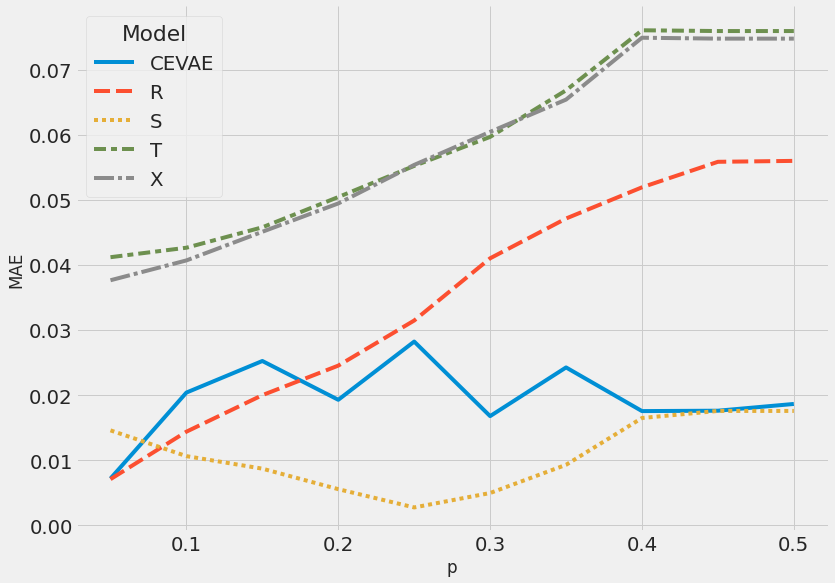

In [29]:
fig, ax = plt.subplots(figsize = (12,9))
grouped = twins_final_metrics.groupby(['p', 'Model'])[['PEHE', 'MAE']].median()
sns.lineplot(x = 'p', y = 'MAE', hue = 'Model', style = 'Model', data = grouped)
sns.despine()

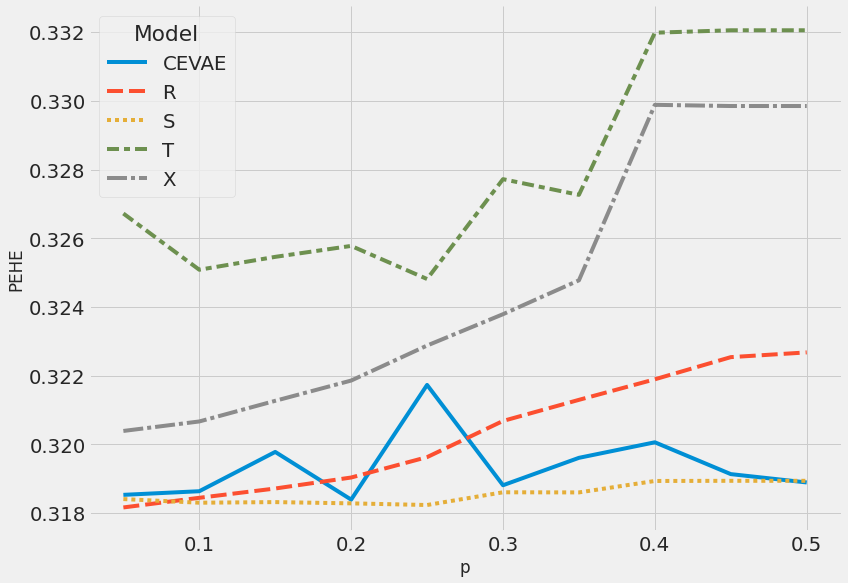

In [30]:
fig, ax = plt.subplots(figsize = (12,9))
grouped = twins_final_metrics.groupby(['p', 'Model'])[['PEHE', 'MAE']].median()
sns.lineplot(x = 'p', y = 'PEHE', hue = 'Model', style = 'Model', data = grouped)
sns.despine()

Podemos ver que todos os outros meta-learners pioraram significativamente com aumento do nível randomização dos proxies. No entanto, o S-learner, surpreendentemente, manteve ainda o melhor MAE. O CEVAE, assim como em [1], se manteve estável durante o aumento da randomização dos proxies e também um nível de erro MAE nas mesmas magnitudes do que em seu artigo original [1].



## Conclusão

Neste trabalho, apresentamos conceitos de causalidade em machine learning e introduzimos dois datasets que geralmente são usados como benchmarking.

Acredito que consegui demonstrar bem o artigo [1] e como o CEVAE se permaneceu robusto a proxies cada vez mais fracas em relação ao seu unobsorved confounder.

O S-learner foi o que mais me surpreendeu neste trabalho, pois apesar de ser simples, mostrou 
bons resultados. Acredito que por esses dois datasets serem pequenos, a simplicidade se mostrou essencial. 


## Referências

[1] Louizos, Christos, et al. "Causal effect inference with deep latent-variable models." Advances in neural information processing systems 30 (2017). </br>
[2] Hill, Jennifer L. "Bayesian nonparametric modeling for causal inference." Journal of Computational and Graphical Statistics 20.1 (2011): 217-240. </br>
[3] LaLonde, Robert J. "Evaluating the econometric evaluations of training programs with experimental data." The American economic review (1986): 604-620. </br>
[4] Pearl, Judea. Causality. Cambridge university press, 2009 </br>
[5] Künzel, Sören R., et al. "Metalearners for estimating heterogeneous treatment effects using machine learning." Proceedings of the national academy of sciences 116.10 (2019): 4156-4165. </br>
[6] Angrist, Joshua D., Guido W. Imbens, and Donald B. Rubin. "Identification of causal effects using instrumental variables." Journal of the American statistical Association 91.434 (1996): 444-455.</br>
[7] Kallus, Nathan, Aahlad Manas Puli, and Uri Shalit. "Removing hidden confounding by experimental grounding." Advances in neural information processing systems 31 (2018). </br>
[8] Bica, Ioana, Ahmed Alaa, and Mihaela Van Der Schaar. "Time series deconfounder: Estimating treatment effects over time in the presence of hidden confounders." International Conference on Machine Learning. PMLR, 2020. </br>
[9] Ke, Guolin, et al. "Lightgbm: A highly efficient gradient boosting decision tree." Advances in neural information processing systems 30 (2017).